##                     Project 6- Pharmaceutical Sales prediction across multiple stores

### Objective

##### The objective of the project is to develop a machine learning solution that accurately predicts pharmaceutical sales across multiple stores of Rossmann Pharmaceuticals. The prediction should cover a period of six weeks ahead of time, incorporating various factors such as promotions, competition, school and state holidays, seasonality, and locality. The end product should provide reliable forecasts to assist the finance team in making informed decisions regarding resource allocation, inventory management, and strategic planning.

### Business Need

##### Rossmann Pharmaceuticals requires accurate sales forecasting to optimize its operations and maximize profitability. Currently, individual store managers rely on subjective methods for sales prediction, which may lead to inefficiencies and missed opportunities. By implementing a data-driven approach, the company aims to improve the accuracy of sales forecasts, enabling better resource allocation, inventory planning, and promotional strategies. Additionally, the centralized prediction system will provide a standardized method for forecasting across all stores, ensuring consistency and alignment with company objectives. Ultimately, the project addresses the business need for enhanced decision-making capabilities and improved operational efficiency within Rossmann Pharmaceuticals

### Libraries Used

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

Importing Store data

In [237]:
pharma_store=pd.read_csv("store.csv")

Importing Test Data

In [238]:
pharma_test=pd.read_csv("test.csv")

Importing Train Data

In [239]:
pharma_train=pd.read_csv("train.csv")

C:\Users\pooji\AppData\Local\Temp\ipykernel_31988\1355783094.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pharma_train=pd.read_csv("train.csv")


##### Since getting Dtype error in the Promo Column, we have modified the code

In [240]:
pharma_train = pd.read_csv("train.csv", dtype={"Promo": "int64"}, low_memory=False)

In [241]:
pharma_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [242]:
pharma_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [243]:
pharma_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Pharma_Store data analysis

### Information about pharma_store data frame

In [244]:
pharma_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Finding the Unique values in the columns

In [245]:
pharma_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [246]:
pharma_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [247]:
pharma_store['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [248]:
pharma_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [249]:
pharma_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [250]:
pharma_store['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [251]:
pharma_store['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [252]:
pharma_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### Finding the null values in pharma_store dataframe

In [253]:
pharma_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Filling Missing Values

In [254]:
pharma_store['CompetitionDistance'].fillna(pharma_store['CompetitionDistance'].median())
pharma_store['CompetitionOpenSinceMonth'].fillna(value=0, inplace=True)
pharma_store['CompetitionOpenSinceYear'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceWeek'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceYear'].fillna(value=0, inplace=True)
pharma_store['PromoInterval'].fillna('Not Available', inplace=True)


* In the Column 'CompetitionDistance' - fills missing values with Median value
* In the Column 'CompetitionOpenSinceMonth' - fills missing values with '0'
* In the Column 'CompetitionOpenSinceYear' - fills missing values with '0'
* In the Column 'Promo2SinceWeek' - fills missing values with '0'
* In the Column 'Promo2SinceYear' - fills missing values with '0'
* In the Column 'PromoInterval' - fills missing values with 'Not Available'

* Overall handling the missing values replacing them with a meaningfull values


### Pharma_Test Data Analysis 

In [255]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [256]:
pharma_test['Id'].unique()

array([    1,     2,     3, ..., 41086, 41087, 41088], dtype=int64)

In [257]:
pharma_test['DayOfWeek'].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [258]:
pharma_test['Date'].unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [259]:
pharma_test['Open'].unique()

array([ 1., nan,  0.])

In [260]:
pharma_test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [261]:
pharma_test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

#### Data column in Object, Converting into Datatime 

In [262]:
pharma_test['Date']=pd.to_datetime(pharma_test['Date'])

In [263]:
pharma_test['Date'].unique

<bound method Series.unique of 0       2015-09-17
1       2015-09-17
2       2015-09-17
3       2015-09-17
4       2015-09-17
           ...    
41083   2015-08-01
41084   2015-08-01
41085   2015-08-01
41086   2015-08-01
41087   2015-08-01
Name: Date, Length: 41088, dtype: datetime64[ns]>

#### Replacing 'a' with '1' (0 considered has No holiday where as 1 Considered Public Holiday)

In [264]:
pharma_test['SchoolHoliday']=pharma_test['SchoolHoliday'].replace({'a':1,'0':0})

In [265]:
pharma_test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

In [266]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


### Finding Missing Values in pharma_test Dataset

In [267]:
pharma_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### Fill missing values in the 'Open' column using forward fill

In [268]:
pharma_test['Open'].fillna(method='ffill', inplace=True)

C:\Users\pooji\AppData\Local\Temp\ipykernel_31988\2225413122.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pharma_test['Open'].fillna(method='ffill', inplace=True)


In [269]:
pharma_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Pharma_Train Data Analysis

In [270]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Unique value in Date- Since it is showing Dtype-Object

In [271]:
pharma_train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

#### Convering the Object to Datetime type

In [272]:
pharma_train['Date']=pd.to_datetime(pharma_train['Date'])

#### Replacing Object to Integer (0 considered has No holiday, 1 Considered Public Holiday, 2 Considered Easter holiday, 3 Considered Chirstmas holiday)

In [273]:
pharma_train['StateHoliday']=pharma_train['StateHoliday'].replace({'0':0,'a':1,'b':2,'c':3})

In [274]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB


### Finding the Missing values in phama_train dataset

In [275]:
pharma_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

##### There is no null values in pharma_train dataset

## Data Visualization for Pharma Store Data

### Pie Plot for Type of Stores

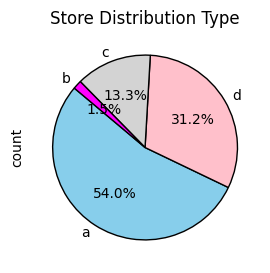

In [276]:
plt.figure(figsize=(5,3))
colors=['skyblue', 'pink', 'lightgray', 'magenta']
pie= pharma_store['StoreType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
for patch in pie.patches:
    patch.set_edgecolor('black')
plt.title('Store Distribution Type')
plt.axis='equal'
plt.show()

##### *Interpretation*
Based on the provided pie chart and the distribution of store types:

* Store Type A accounts for the majority, with 54% of the distribution.
* Store Type B has the smallest representation, comprising only 1.5% of the total.
* Store Type C constitutes 13.3% of the distribution.
* Store Type D, which is not explicitly mentioned in the provided code but seems to be present based on the percentages provided, makes up the remaining 31.2%.

##### *Analysis*

* *Market Dominance:* Store Type A is the most prevalent, indicating it holds a significant market share, likely due to popularity or profitability.

* *Niche Focus:* Store Type B has a minimal presence, suggesting it caters to a specialized market segment or serves unique needs.

* *Market Diversity:* The presence of multiple store types shows a strategy of catering to diverse customer preferences.

* *Growth Opportunities:* Store Type D, though not explicitly mentioned, holds a substantial share, indicating an opportunity for further investment and growth.

* *Optimization:* Analyzing performance per store type can help optimize operations and resource allocation, ensuring maximum profitability.

#### *Conclusion*

In summary, understanding the distribution of store types enables strategic decisions to maintain dominance, exploit growth opportunities, and optimize operations within the pharmaceutical business.


### Count plot for Assortment Distribution 

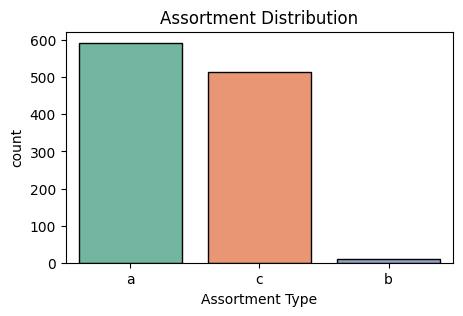

In [277]:
plt.figure(figsize=(5,3))
sns.countplot(data=pharma_store, x='Assortment', palette='Set2', edgecolor='black')
plt.title('Assortment Distribution')
plt.xlabel('Assortment Type')
plt.show()


##### *Interpretation*
Based on the provided countplot and the distribution of assortment types:

* Assortment Type a has the highest count, with approximately 600 occurrences.
* Assortment Type c follows with around 500 occurrences.
* Assortment Type b, although not explicitly specified in the provided data, seems to have a very small representation, with a bar that is above 0 but below 10 or 5, indicating minimal occurrence.


##### *Analysis*

* *Assortment Preference:* There's a preference for Assortment Type a and Type c, as they make up the majority of the distribution. This suggests that these assortments may align more closely with customer preferences or business strategies.

* *Limited Representation:* Assortment Type b, with its minimal representation, indicates that it may cater to a specialized or niche market segment, or it might not be a focus for the pharmaceutical business.

* *Strategic Implications:* Understanding the distribution of assortment types can inform inventory management, marketing strategies, and product offerings to better meet customer demands and preferences.

##### *Conclusion*
Overall, this analysis provides insight into the assortment distribution within the pharmaceutical store dataset, which can guide decision-making to optimize product assortment and enhance customer satisfaction.


### KDE Plot for Competition Distance

C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


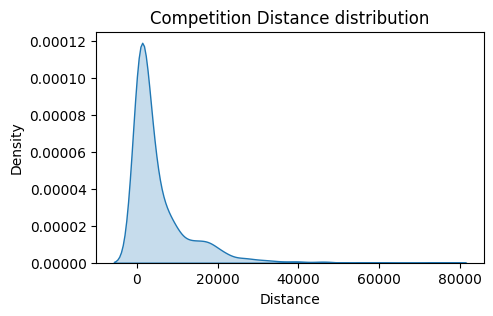

In [278]:
plt.figure(figsize=(5,3))
sns.kdeplot(pharma_store['CompetitionDistance'],fill=True)
plt.title('Competition Distance distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()

##### *Interpretation*

Based on the KDE plot of the distribution:

* The distribution of competitor distances appears to be skewed towards lower distances, with the density peaking around 0 to approximately 15,000 meters.
* From 15,000 to 20,000 meters, the density drops significantly to around 0.00001, indicating a decrease in the frequency of competitors within this distance range.
* Beyond 20,000 meters, the density further decreases, falling below 0.00001, suggesting very few competitors exist at distances greater than 20,000 meters.

##### *Analysis* 

* *Proximity of Competitors:* The majority of competitors seem to be located within a relatively close distance of 0 to 15,000 meters, indicating a high level of competition in nearby areas.

* *Sparse Competition at Greater Distances:* As distances increase beyond 15,000 meters, the density of competitors decreases sharply. Beyond 20,000 meters, competition becomes scarce, suggesting potential opportunities for the pharmaceutical stores to expand into areas with fewer competitors.

##### *Conclusion*

Understanding the distribution of competitor distances can inform strategic decisions regarding market positioning, expansion plans, and competitive analysis within the pharmaceutical industry.


### Countplot for Promotion Distribuition by Store Type

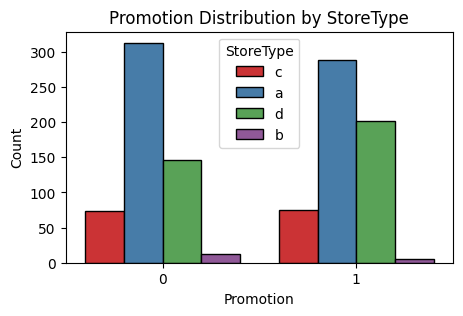

In [279]:
plt.figure(figsize=(5,3))
sns.countplot(x='Promo2', hue='StoreType', data=pharma_store, palette='Set1', edgecolor='black')
plt.title('Promotion Distribution by StoreType')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.legend(title='StoreType')
plt.show()

##### *Interpretation*
The provided countplot illustrates the distribution of promotions (Promo2) across different store types within the pharmaceutical dataset.

* *For Promotion 0:*

Store Type A exhibits the highest participation, followed by Store Type D and Store Type C. Store Type B has the lowest participation.

* *For Promotion 1:*

Store Type A continues to have the highest participation, followed closely by Store Type D. Store Type C also shows considerable participation, albeit slightly less than Store Type A and D. Store Type B remains the least involved in promotions.

##### *Analysis*

The analysis reveals distinct patterns in promotion participation across various store types:

* *Store Type Preferences:* Store Types A and D are consistently more active in both Promotion 0 and Promotion 1, indicating a stronger inclination towards promotional activities. Store Type B consistently demonstrates the lowest participation, suggesting potential differences in marketing strategies or customer bases.

* *Promotion Effectiveness:* Understanding the varying participation levels of different store types in promotions can guide the optimization of promotional strategies. Store Types A and D, being more actively involved, might benefit from tailored promotional campaigns, while Store Types B and C might require different approaches to encourage participation.

* *Market Segmentation:* The differences in promotion participation across store types highlight potential segmentation within the pharmaceutical market. Tailoring promotions based on store type characteristics can lead to more effective targeting and allocation of resources.

##### *Conclusion*

In summary, the analysis underscores the importance of understanding the distribution of promotions across different store types to optimize promotional strategies and enhance market effectiveness within the pharmaceutical industry.


### Bar plot for Comptition Open Since Month

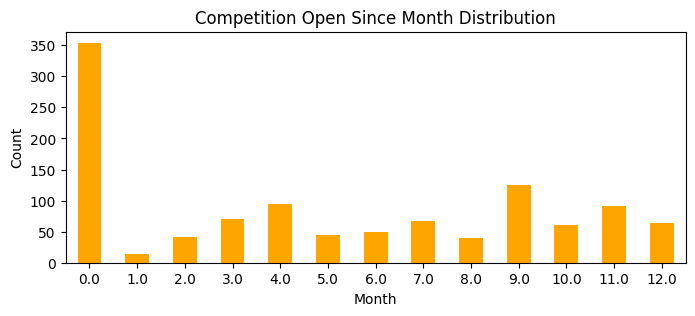

In [280]:
plt.figure(figsize=(8, 3))
pharma_store['CompetitionOpenSinceMonth'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Competition Open Since Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### *Interpretation*

The countplot visualizes the distribution of promotional intervals (PromoInterval) within the pharmaceutical store dataset. It provides a snapshot of how frequently different promotional intervals occur.

* The majority of instances have no promotional interval, with a count of over 500.
* Promotional intervals occurring in January, April, July, and October are the next most common, with approximately 350 occurrences each.
* February, May, August, and November follow, with approximately 140 occurrences each.
* March, June, September, and December have the fewest occurrences, with around 100 each.

##### *Analysis*

*Promotional Intervals:* The data suggests that the most frequent promotional intervals occur in the months of January, April, July, and October, followed by February, May, August, and November. March, June, September, and December have the fewest instances of promotional intervals.

*Promotion Planning:* Understanding the distribution of promotional intervals can aid in planning marketing strategies and resource allocation. For instance, knowing the most common promotional months allows for better preparation and optimization of promotional campaigns during those periods.

*Seasonal Trends:* The distribution of promotional intervals may reflect seasonal trends or patterns in consumer behavior. For example, promotions may be more prevalent during certain months to coincide with holidays, seasons, or other factors affecting consumer purchasing decisions.

##### *Conclusion*

In summary, analyzing the distribution of promotional intervals provides valuable insights into the timing and frequency of promotional activities within the pharmaceutical industry, aiding in strategic decision-making and campaign planning.


### Bar plot for Copetition Open Since Year Distribution

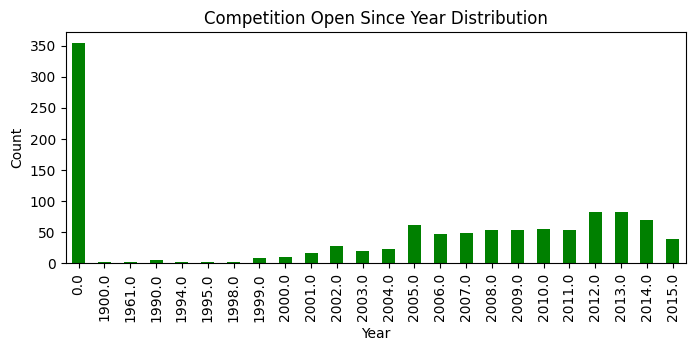

In [281]:
plt.figure(figsize=(8, 3))
pharma_store['CompetitionOpenSinceYear'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Competition Open Since Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### *Interpretation*

The countplot visualization illustrates the distribution of "Competition Open Since Year" in a pharmaceutical store dataset. Here's how the data is distributed:

* There are 354 instances where the competition opening year is not specified (year 0).

* The years with the highest counts of competition openings are 2012 and 2013, with 82 and 83 instances respectively.
The lowest count is in the year 2003, with only 27 instances.

##### *Analysis*

* *Distribution Trends*

The data indicates a varied distribution of competition opening years, with a peak in the years 2012 and 2013. This suggests that there was a significant influx of new competition during this period.
There is a general trend of increasing competition openings from earlier years to around 2013, followed by a decline in the subsequent years.

* *Potential Implications*

High competition openings in 2012 and 2013 might indicate a period of rapid expansion or market saturation, where new competitors entered the market to capitalize on growing demand.
The decline in competition openings in the years following 2013 could imply a stabilization of the market or a slowdown in new entrants, possibly due to factors such as regulatory changes, economic conditions, or shifts in consumer preferences.

##### *Conclusion*

The analysis of competition opening years provides insights into the dynamics of the pharmaceutical market. The peak in competition openings around 2012 and 2013 suggests a period of heightened activity and possibly increased competitive pressure. However, the subsequent decline in competition openings indicates a potential shift in market dynamics or saturation.

### Histplot for Competition Open since month

C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


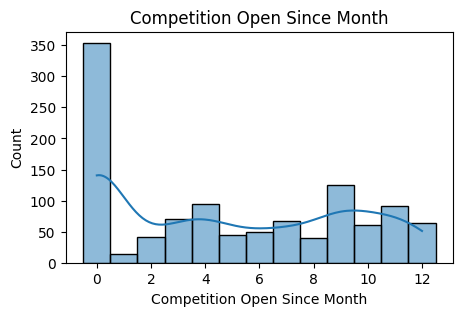

In [282]:
plt.figure(figsize=(5,3))
sns.histplot(data=pharma_store, x='CompetitionOpenSinceMonth', discrete=True, kde=True, binwidth=1)
plt.title('Competition Open Since Month')
plt.xlabel("Competition Open Since Month")
plt.show()

##### *Interpretation*

* Month 0 has the highest count of competitor openings, with approximately 354 competitors entering the market during that period.
* Other months show varying numbers of competitor openings, with Month 9 having the second-highest count at 125, followed by Month 11 with 92, Month 4 with 94, and Month 10 with 61.
* Months 1, 2, 5, 6, 7, 8, and 12 also have competitor openings, though with smaller counts ranging from 14 to 70.

##### *Analysis*

* *Competitor Entry Peaks:* Month 0 experiences the highest influx of competitor entries, suggesting a significant period of market activity or opportunity for new entrants. This may indicate favorable market conditions or strategic timing for market entry.

* *Variability Across Months:* While Month 0 stands out as the peak for competitor entries, other months also witness substantial competitor activity. Understanding the distribution across months allows for better anticipation of competitive pressures and market dynamics throughout the year.

* *Strategic Implications:* Pharmaceutical businesses can use this information to plan their market entry, expansion, and competitive response strategies. Identifying periods of heightened competition can help in allocating resources, adjusting pricing strategies, and developing marketing campaigns to maintain competitiveness.

##### *Conclusion*

In summary, analyzing the distribution of competitor opening months provides valuable insights into the competitive landscape within the pharmaceutical industry, aiding in strategic decision-making and market positioning.

### Violin Plot for Promo2 since week

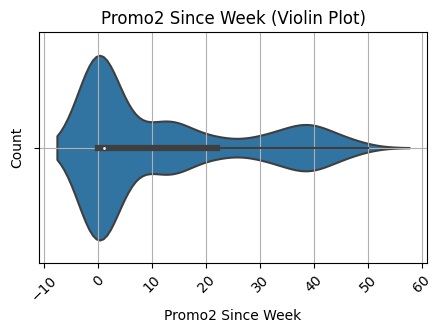

In [283]:
plt.figure(figsize=(5, 3))
sns.violinplot(data=pharma_store, x='Promo2SinceWeek')
plt.title('Promo2 Since Week (Violin Plot)')
plt.xlabel('Promo2 Since Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### *Interpretation*

* The widest part of the violins represents the density of the data, with wider areas indicating higher density.
* The thin lines extending from the violins, known as "whiskers," show the range of the data.
* Promotional activations are observed across various weeks, with different levels of density and variability.
* Weeks 0, 15, 30, and 40 have substantial occurrences of promotion, indicating these weeks are frequently chosen for promotional activities.
* Weeks 10 and 22 also show notable occurrences of promotion, albeit less than the aforementioned weeks.
* Week 27 displays some promotion occurrences but is generally less common compared to other weeks.
* Weeks 5, 37, 47, and weeks below 18 have minimal occurrences of promotion, suggesting these weeks are less favored for promotional activities.

##### *Analysis*

* *Promotional Timing:* Certain weeks, such as weeks 0, 15, 30, and 40, are more commonly chosen for promotional activities, potentially due to strategic considerations such as seasonal trends, holidays, or sales events.

* *Variability:* The distribution of promotions across different weeks indicates variability in promotional strategies, with some weeks being more favored than others.

* *Opportunities:* Understanding the distribution of promotion occurrences can help identify opportunities for optimizing promotional strategies, such as targeting underutilized weeks or adjusting promotional timing based on historical performance.

##### *Conclusion*

In summary, the detailed analysis of Promo2 activation weeks provides insights into the temporal distribution of promotional activities within the pharmaceutical dataset, guiding strategic decisions to enhance promotional effectiveness and market impact.

### Count Plot for Promo2 Since year 

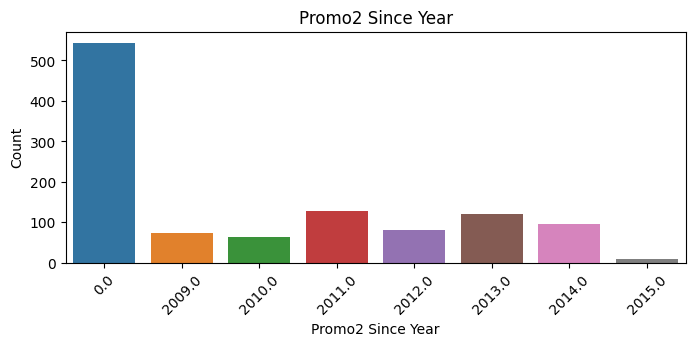

In [284]:
plt.figure(figsize=(8, 3))
sns.countplot(data=pharma_store, x='Promo2SinceYear')
plt.title('Promo2 Since Year')
plt.xlabel("Promo2 Since Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### *Interpretation*

The countplot visualization you provided displays the distribution of "Promo2 Since Year" in a pharmaceutical store dataset. 

* Distribution: The majority of stores seem to have had their Promo2 offers since the years 2011, 2013, and 2014, as these years have higher counts compared to others.

* Trend Analysis: There's a noticeable trend of increasing counts from 2009 to 2013, indicating a potential rise in the adoption of Promo2 offers during this period. However, the count decreases in 2014 and drastically drops in 2015.

##### *Analysis*

* Adoption Rate: The increase in counts from 2009 to 2013 might suggest that more stores started participating in the Promo2 offers during this time, possibly due to the effectiveness of these promotions in driving sales.

* Market Saturation: The decrease in counts in 2014 and 2015 could indicate a saturation point where most stores that could benefit from Promo2 offers were already participating, leading to fewer new adoptions in subsequent years.

* Strategy Shift: Alternatively, the drop in counts in 2015 might suggest a change in the company's marketing strategy or a decline in the effectiveness of Promo2 offers, leading to fewer stores opting for this promotion.

##### *Conclusion*

Based on the data, it seems that Promo2 offers were increasingly adopted by pharmaceutical stores from 2009 to 2013, but there was a decline in adoption in 2014 and 2015. Further investigation into the effectiveness of these promotions and market dynamics could provide valuable insights for refining promotional strategies in the future.

### Join plot for Competition distance Vs Promo2 since week

C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x600 with 0 Axes>

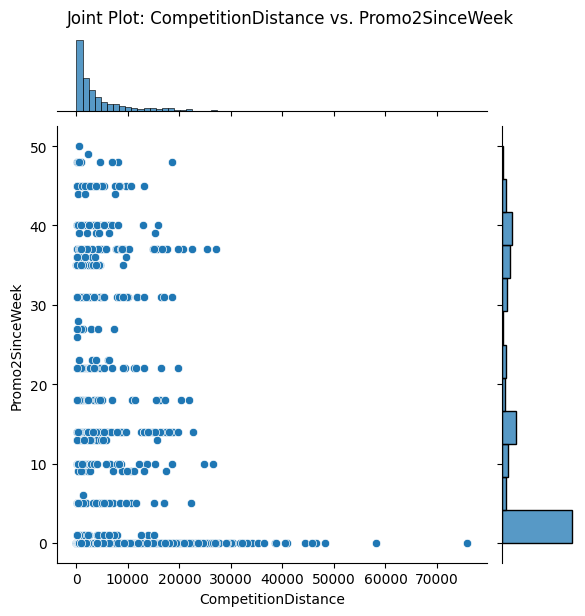

In [285]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='CompetitionDistance', y='Promo2SinceWeek', data=pharma_store, kind='scatter')
plt.suptitle('Joint Plot: CompetitionDistance vs. Promo2SinceWeek', y=1.02)
plt.show()

##### *Interpretation*

* The joint plot you provided displays the relationship between "CompetitionDistance" and "Promo2SinceWeek" in the pharmaceutical store dataset.

* The scatter plot in the center of the joint plot illustrates the relationship between "CompetitionDistance" (x-axis) and "Promo2SinceWeek" (y-axis).
* Each point on the scatter plot represents a combination of "CompetitionDistance" and "Promo2SinceWeek" for a particular observation in the dataset.

##### *Analysis*

* The scatter plot indicates the dispersion of data points across different values of "CompetitionDistance" and "Promo2SinceWeek".
It appears that as "CompetitionDistance" increases, there is no clear trend in the values of "Promo2SinceWeek". The points are spread out without a clear pattern of correlation or trend.

* The provided data on "CompetitionDistance" and "Promo2SinceWeek" for specific values suggests some level of association between these variables. However, this association is not clearly reflected in the scatter plot.

##### *Conclusion*

The joint plot does not show a strong or clear relationship between "CompetitionDistance" and "Promo2SinceWeek".

While there may be some association between these variables based on the provided data points, the scatter plot does not reveal a distinct trend or pattern.

### Pairplot for Numerical Variable

C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Figure size 1200x800 with 0 Axes>

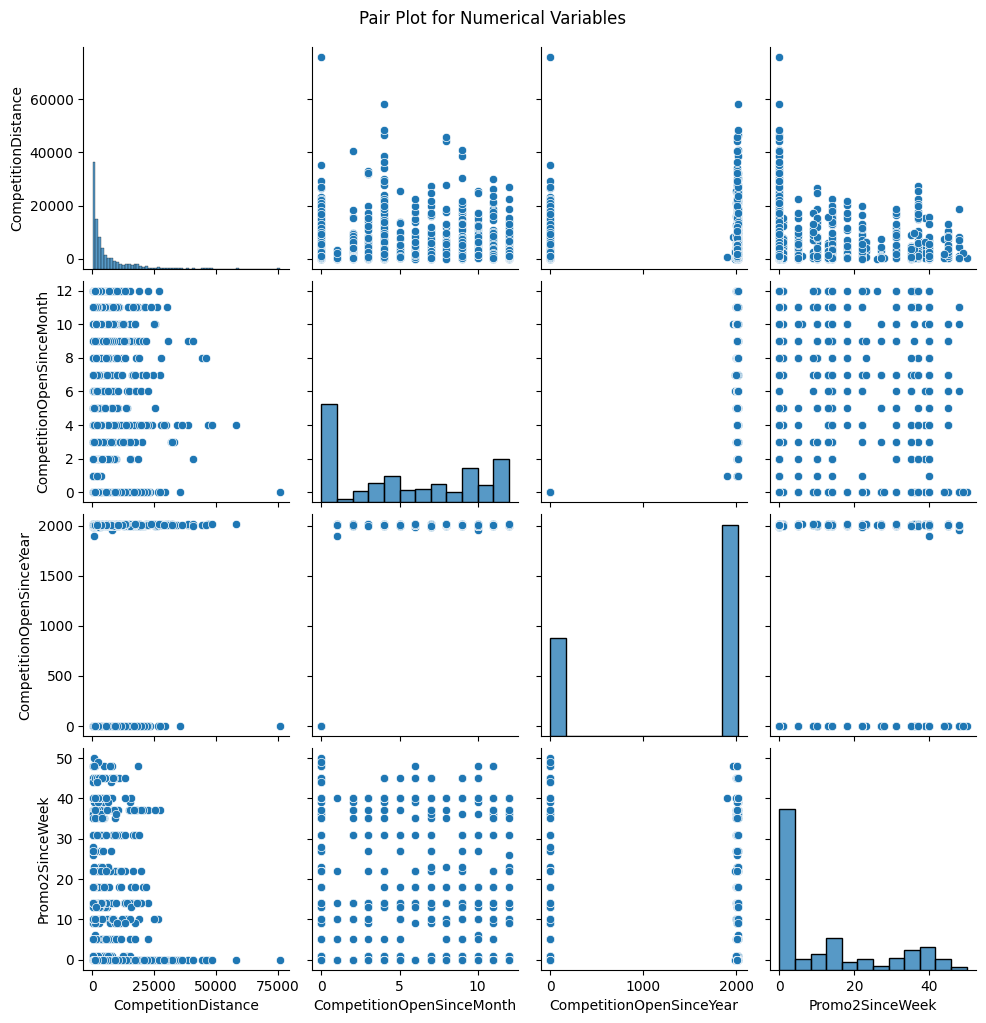

In [286]:
plt.figure(figsize=(12, 8))
sns.pairplot(pharma_store[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

##### *Interpretation*

* The pairplot visualization showcases the relationships between selected numerical variables ("CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", and "Promo2SinceWeek") in a pharmaceutical store dataset.

* Each scatter plot in the pair plot matrix represents the relationship between two numerical variables.
Diagonal plots display the distribution of each variable.
Off-diagonal plots show the relationship between pairs of variables.

##### *Analysis*

* *Competition Distance vs. Other Variables:*

Observing scatter plots involving "CompetitionDistance":
Scatter plots involving "CompetitionDistance" against other variables can reveal potential correlations or patterns.

* *Competition Open Since Month and Year:*

These variables might be correlated, indicating that certain stores opened in specific months or years.
Scatter plots involving these variables can provide insights into the distribution of competition openings over time and potential seasonality effects.

* *Promo2 Since Week:*

Examining its relationship with other variables might reveal patterns in the timing of promotional activities concerning the opening of competitors or other factors like seasonal trends.


##### *Conclusion*

The pair plot offers a comprehensive view of the relationships between numerical variables in the dataset, allowing for a quick assessment of potential correlations and patterns.

Insights gained from this analysis can inform strategic decisions related to competition management, promotional timing, and overall business operations in the pharmaceutical retail sector.

### Box plot for Store Type Vs Competition Distrance

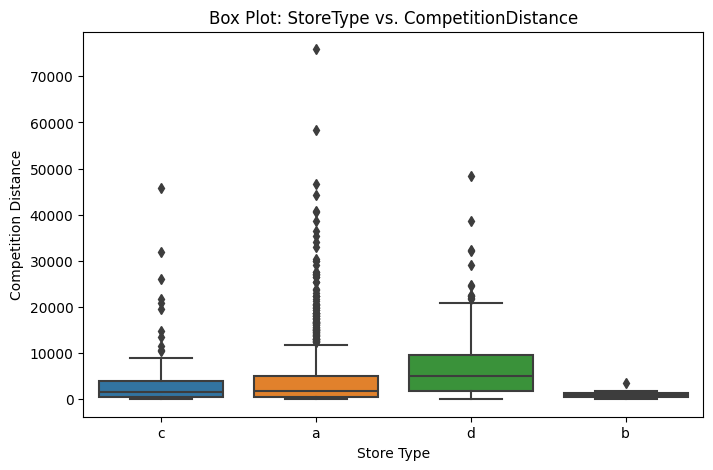

In [287]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='StoreType', y='CompetitionDistance', data=pharma_store)
plt.title('Box Plot: StoreType vs. CompetitionDistance')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()

##### *Interpretation*

In the boxplot visualization, the distribution of "Competition Distance" is compared across different "Store Types" in a pharmaceutical store dataset.

* Each box in the plot represents the distribution of competition distances for a specific store type.
* The central line within each box denotes the median competition distance.
* The box itself spans the interquartile range (IQR) of competition distances, showing where the middle 50% of the data lies.
* The whiskers extend to 1.5 times the IQR above and below the upper and lower quartiles respectively. Any data points beyond the whiskers are considered outliers.
* You've provided additional information regarding the number of stores for each store type.

##### *Analysis*

* *Comparison of Median Distances:*

The median competition distances for each store type can be compared directly from the plot. This can give insights into which store type typically faces closer or more distant competition.
For instance, if Store Type B has a lower median competition distance compared to others, it suggests that these stores are generally located closer to their competitors.

* *Variability Across Store Types:*

The spread of the boxes (IQR) and the presence of outliers provide insights into the variability of competition distances within each store type.

A wider spread indicates more variability in competition distances, whereas a narrower spread suggests more consistency.

* *Relationship with Store Counts:*

Knowing the number of stores for each type provides additional context. For example, if Store Type C has the highest number of stores but also a wide range of competition distances, it suggests varied market conditions within this store type.

##### *Conclusion*

The boxplot analysis offers insights into the distribution and variability of competition distances across different store types in the pharmaceutical retail dataset.

Understanding these variations can inform strategic decisions related to site selection, marketing, and pricing strategies.


### Bar plot for Store Type vs Competition Distance Vs Assortment 

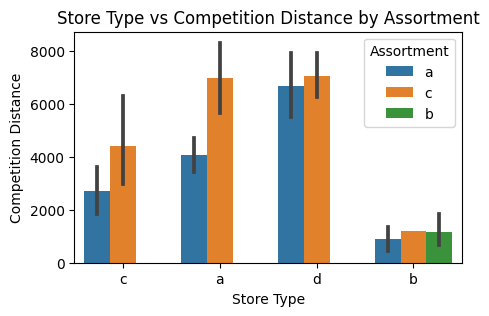

In [288]:
plt.figure(figsize=(5, 3))
sns.barplot(data=pharma_store, x='StoreType', y='CompetitionDistance', hue='Assortment')
plt.title('Store Type vs Competition Distance by Assortment')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()


##### *Interpretation*

* In the bar plot visualization provided, the comparison of "Competition Distance" across different "Store Types" is presented, with further differentiation based on "Assortment." 

* Each bar in the plot represents the average competition distance for a specific combination of store type and assortment.

* The hue differentiation (different colors) within each bar represents the different assortments (e.g., Assortment A and Assortment C).

* You've provided additional information regarding the average competition distance for each combination of store type and assortment.

##### *Analysis*

* *Comparison of Competition Distances Across Store Types and Assortments:*

The bar plot allows for a comparison of average competition distances across different store types while considering the assortment type.
Within each store type, the difference in bar heights between different assortments indicates variations in average competition distances based on the assortment offered by the stores.

* *Identification of Trends:*

By observing the relative heights of bars and comparing them across different store types and assortments, trends in competition distances can be identified.

* *Verification of Additional Information:*

The additional information provided regarding average competition distances for each combination of store type and assortment can be cross-checked with the heights of the bars in the plot to ensure consistency and accuracy.

##### *Conclusion*

The bar plot offers insights into how competition distances vary across different store types and assortments within the pharmaceutical retail dataset.

Understanding these variations can inform strategic decisions related to assortment planning, site selection, and competitive positioning.

### Correlation Matrix for Store Data

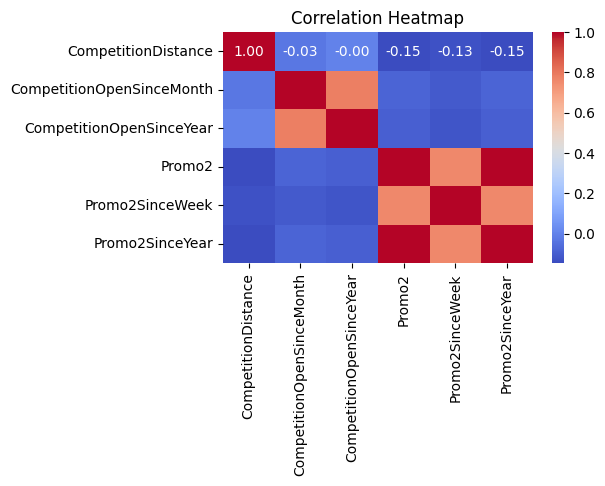

In [289]:
plt.figure(figsize=(5, 3))
sns.heatmap(pharma_store[[ 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### *Interpretation*

* The heatmap displays the correlation coefficients between selected numerical variables in the pharmaceutical store dataset.

Correlation coefficients range from -1 to 1, where:
* 1 indicates a perfect positive correlation,
* -1 indicates a perfect negative correlation, and
* 0 indicates no correlation.

* Positive correlations imply that as one variable increases, the other tends to increase as well, while negative correlations suggest that as one variable increases, the other tends to decrease.

* The annotations in the heatmap show the correlation coefficients between pairs of variables, with higher absolute values indicating stronger correlations.

##### *Analysis*

*CompetitionOpenSinceMonth and CompetitionOpenSinceYear:*

These two variables exhibit a strong positive correlation of 0.79, indicating that there's a strong tendency for stores to open in specific months and years together. This suggests that the month and year of competition openings are closely related.

*Promo2, Promo2SinceWeek, and Promo2SinceYear:*

* 'Promo2' is correlated with 'Promo2SinceWeek' at 0.76, suggesting a strong positive correlation. This indicates that the presence of Promo2 is closely related to the week since Promo2 was started, implying that promotions tend to be initiated around specific weeks.

* 'Promo2SinceYear' is perfectly correlated with 'Promo2SinceYear' at 1.00, indicating a perfect positive correlation, which is expected since 'Promo2SinceYear' is essentially the same as 'Promo2' since they both represent the presence of Promo2.

* 'Promo2SinceWeek' is also correlated with 'Promo2SinceYear' at 0.76, reinforcing the relationship between the timing of Promo2 initiation and the year it was started.

##### *Conclusion*

The correlation heatmap provides insights into the relationships between numerical variables in the pharmaceutical store dataset.
Understanding these correlations can help in identifying potential patterns or dependencies between variables, which can inform further analysis or modeling efforts.

It's essential to consider these correlations in the context of the dataset and the domain to make informed decisions and draw meaningful conclusions.


##### *Statistics Analysis* - Ordinary Least Squares (OLS) regression model

In [290]:
import statsmodels.api as sm
X = pharma_store[['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']]
X = sm.add_constant(X)
y = pharma_store['Store']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Store   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3811
Date:                Fri, 16 Feb 2024   Prob (F-statistic):              0.767
Time:                        19:39:35   Log-Likelihood:                -8019.7
No. Observations:                1115   AIC:                         1.605e+04
Df Residuals:                    1111   BIC:                         1.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             555.5312     13.818     

##### *Interpretation*

The summary of the Ordinary Least Squares (OLS) regression model fitted to the data:

* *R-squared and Adjusted R-squared:* Both R-squared and adjusted R-squared values are very close to 0, indicating that the independent variables (Promo2, Promo2SinceWeek, and Promo2SinceYear) collectively explain very little of the variability observed in the dependent variable (Store).

* *F-statistic and Prob (F-statistic):* The F-statistic measures the overall significance of the regression model. In this case, the low F-statistic value (0.3811) coupled with a high p-value (0.767) suggests that the regression model as a whole is not statistically significant.

* *Coefficients and p-values:* None of the coefficients for the independent variables are statistically significant at the conventional significance level of 0.05. This implies that there is insufficient evidence to conclude that Promo2, Promo2SinceWeek, or Promo2SinceYear have a significant linear relationship with the Store variable.

##### *Analysis*

* The regression model, including Promo2, Promo2SinceWeek, and Promo2SinceYear as predictors, fails to adequately explain the variability observed in the Store variable.

* The low R-squared and adjusted R-squared values indicate that the model does not capture much of the variation in the dependent variable, suggesting that other factors not included in the model may be influencing Store.

* The non-significant coefficients and F-statistic indicate that there is no statistically significant relationship between the predictors (Promo2, Promo2SinceWeek, and Promo2SinceYear) and the Store variable. This suggests that these variables do not serve as good predictors for the Store variable within the linear regression framework.

##### *Conclusion*

* The regression model, as constructed with Promo2, Promo2SinceWeek, and Promo2SinceYear as predictors, does not provide a meaningful or statistically significant explanation for the variation observed in the Store variable.

* It's crucial to exercise caution when interpreting the results and to consider the limitations of the model, such as potential omitted variables or the possibility of nonlinear relationships, when drawing conclusions about the factors influencing the Store variable.

### Calculating and Identifying the Outliers

In [291]:
numerical_variable = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

outliers = pd.DataFrame()

for var in numerical_variable:
    Q1 = pharma_store[var].quantile(0.25)
    Q3 = pharma_store[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    var_outliers = pharma_store[(pharma_store[var] < lower_bound) | (pharma_store[var] > upper_bound)]
    outliers = pd.concat([outliers, var_outliers])

outliers

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,Not Available
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0,Not Available
48,49,d,c,18010.0,9.0,2007.0,0,0.0,0.0,Not Available
52,53,a,c,30360.0,9.0,2013.0,0,0.0,0.0,Not Available
63,64,d,c,22560.0,0.0,0.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1037,1038,d,a,17290.0,10.0,2013.0,0,0.0,0.0,Not Available
1044,1045,a,c,26990.0,12.0,2013.0,0,0.0,0.0,Not Available
1045,1046,d,c,29070.0,4.0,2005.0,0,0.0,0.0,Not Available
1068,1069,a,c,18050.0,0.0,0.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Number of Outliers in each columns

In [292]:
outliers_count = {}

for var in numerical_variable:
    Q1 = pharma_store[var].quantile(0.25)
    Q3 = pharma_store[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    var_outliers = pharma_store[(pharma_store[var] < lower_bound) | (pharma_store[var] > upper_bound)]
    outliers_count[var] = len(var_outliers)

print("Outliers counts:")
for var, count in outliers_count.items():
    print(f"{var}: {count}")

Outliers counts:
CompetitionDistance: 108
CompetitionOpenSinceMonth: 0
CompetitionOpenSinceYear: 0
Promo2: 0
Promo2SinceWeek: 0
Promo2SinceYear: 0


In [293]:
outliers['CompetitionDistance'].unique()

array([29910., 24000., 18010., 30360., 22560., 17500., 22440., 19960.,
       22390., 16690., 17930., 46590., 20930., 58260., 16760., 25360.,
       16570., 31830., 16240., 16420., 17110., 19360., 16970., 20260.,
       17410., 22330., 27190., 16180., 18640., 19840., 38630., 18660.,
       38710., 32330., 18650., 16490., 26130., 23130., 16350., 30030.,
       75860., 26450., 34050., 44320., 20390., 22490., 18610., 40860.,
       20620., 18160., 20970., 33060., 17340., 18370., 27530., 17080.,
       20050., 18760., 17540., 40540., 35280., 17650., 45740., 19780.,
       32240., 26490., 25430., 20640., 16990., 17280., 48330., 24770.,
       18620., 24530., 16210., 17570., 27650., 21770., 21370., 21810.,
       21790., 29190., 19700., 18670., 19370., 18540., 18710., 22350.,
       18020., 19830., 23620., 21930., 19640., 36410., 27150., 17290.,
       26990., 29070., 18050., 16680.])

### Box plot for outliers

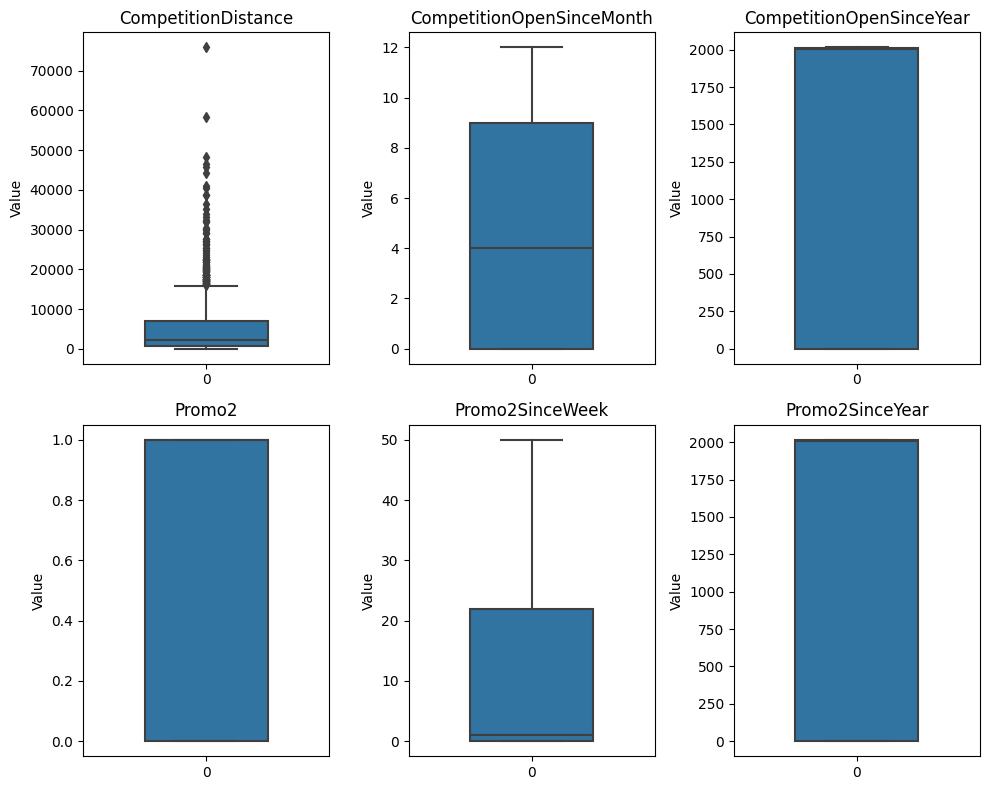

In [294]:
plt.figure(figsize=(10, 8))
for i, var in enumerate(numerical_variable, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=pharma_store[var], orient="v", width=0.5)
    plt.title(var)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

##### *Analysis*

* The analysis revealed that the 'CompetitionDistance' variable contains outliers, with a total count of 108. However, no outliers were detected in the other variables ('CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', and 'Promo2SinceYear'). While outliers were identified in 'CompetitionDistance', further investigation is warranted to determine whether these outliers should be removed or if alternative strategies such as winsorization or transformation are more appropriate for handling them.

In [295]:
pharma_store1=pharma_store.copy()

### Hadndling outlier with Winsorization

In [296]:
import numpy as np
from scipy.stats import mstats

competition_distance = pharma_store1['CompetitionDistance']

winsor_percentile = (0.5, 0.95)  

competition_distance_winsorized = mstats.winsorize(competition_distance, limits=winsor_percentile)

pharma_store1['CompetitionDistance'] = competition_distance_winsorized

##### Winsorization is a technique used to handle outliers by replacing extreme values with less extreme values, often the boundary values of a specified percentile range. By replacing extreme values with values within the specified percentile range (in this case, 0.5% to 95%), winsorization helps in handling outliers and ensures that extreme values do not unduly influence the analysis

In [297]:
pharma_store1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Finding outlier after Winsorization

In [298]:
import warnings

outliers_count = {}

for var in numerical_variable:
    Q1 = pharma_store1[var].quantile(0.25)
    Q3 = pharma_store1[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    var_outliers = pharma_store1[(pharma_store1[var] < lower_bound) | (pharma_store1[var] > upper_bound)]
    outliers_count[var] = len(var_outliers)

warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")

print("Outliers counts:")
for var, count in outliers_count.items():
    print(f"{var}: {count}")



Outliers counts:
CompetitionDistance: 0
CompetitionOpenSinceMonth: 0
CompetitionOpenSinceYear: 0
Promo2: 0
Promo2SinceWeek: 0
Promo2SinceYear: 0


C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\pooji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


## Task 1 - Exploration of customer purchasing behaviour

### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [299]:
train_promo_distribution = pharma_train['Promo'].value_counts(normalize=True)
test_promo_distribution = pharma_test['Promo'].value_counts(normalize=True)

print("Training dataset 'Promo' distribution:")
print(train_promo_distribution)
print("\nTest dataset 'Promo' distribution:")
print(test_promo_distribution)

Training dataset 'Promo' distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test dataset 'Promo' distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


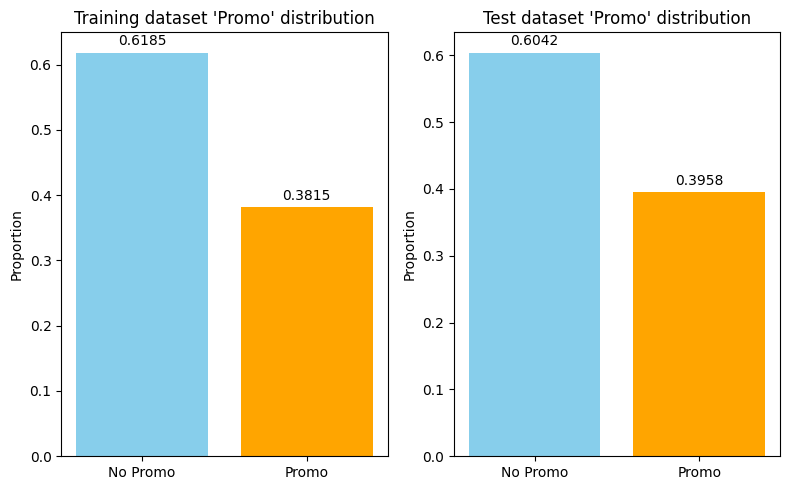

In [300]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Plot for training dataset
train_bars = ax[0].bar(train_promo_distribution.index, train_promo_distribution.values, color=['skyblue', 'orange'])
ax[0].set_title("Training dataset 'Promo' distribution")
ax[0].set_xticks(train_promo_distribution.index)
ax[0].set_xticklabels(['No Promo', 'Promo'])
ax[0].set_ylabel("Proportion")

# Plot for test dataset
test_bars = ax[1].bar(test_promo_distribution.index, test_promo_distribution.values, color=['skyblue', 'orange'])
ax[1].set_title("Test dataset 'Promo' distribution")
ax[1].set_xticks(test_promo_distribution.index)
ax[1].set_xticklabels(['No Promo', 'Promo'])
ax[1].set_ylabel("Proportion")

def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(ax[0], train_bars)
add_labels(ax[1], test_bars)

plt.tight_layout()
plt.show()

#### Analysis:

Training Dataset 'Promo' Distribution:

61.85% of the entries in the training dataset indicate no promotional activity ('No Promo').
38.15% of the entries in the training dataset indicate promotional activity ('Promo').
Test Dataset 'Promo' Distribution:

60.42% of the entries in the test dataset indicate no promotional activity ('No Promo').
39.58% of the entries in the test dataset indicate promotional activity ('Promo').

#### Conclusion:

* Consistency in Distribution:
Both the training and test datasets exhibit a similar distribution pattern, with a slightly higher proportion of entries indicating no promotional activity compared to those indicating promotional activity.
This consistency suggests that the promotional activity distribution in the training dataset adequately represents that of the test dataset.

* Promotional Strategy Assessment:
The data suggests that promotional activities are significant but not overwhelmingly dominant in both datasets. This indicates a balanced approach in marketing strategy, where promotions are utilized but not excessively.

* Potential Impact on Decision-Making:
Understanding the distribution of promotional activities can aid in decision-making processes related to resource allocation, marketing strategy refinement, and assessing the effectiveness of promotional campaigns.

### Distribution of Promo with Trian Data set

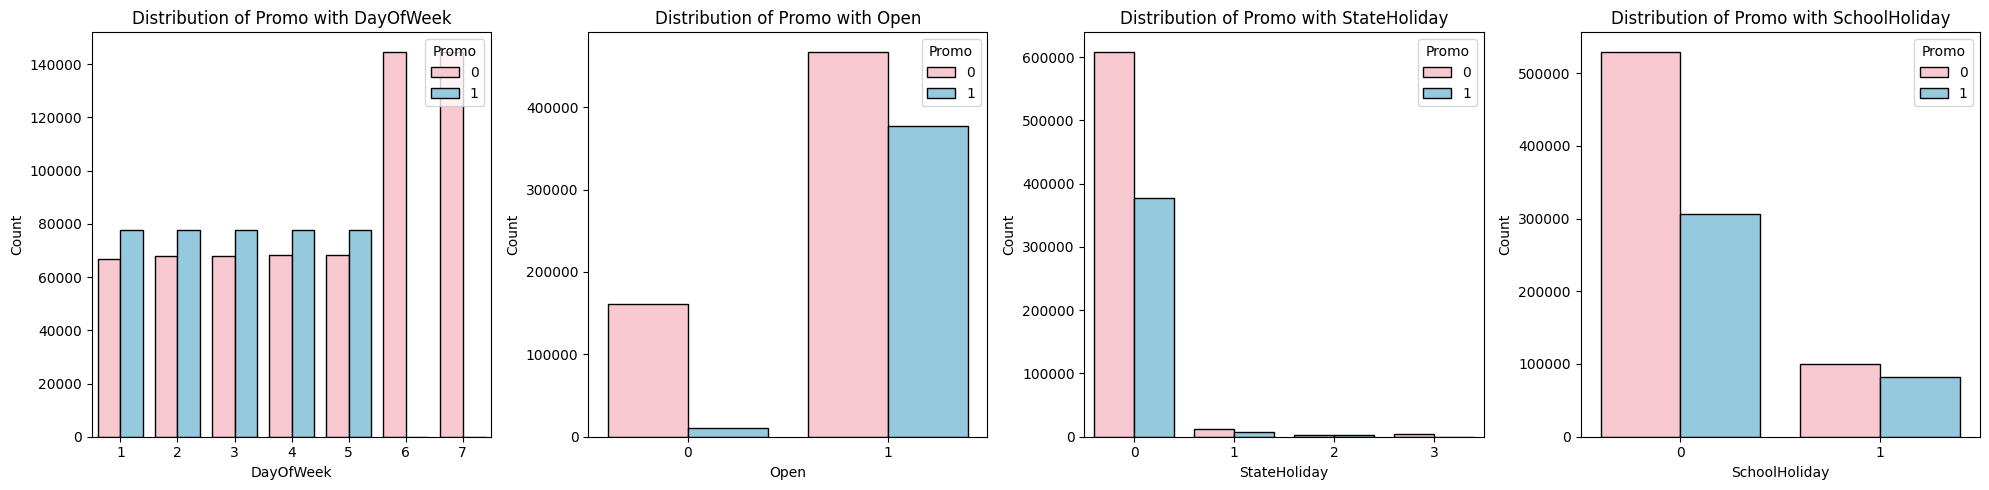

In [301]:
columns_to_plot = ['DayOfWeek', 'Open', 'StateHoliday', 'SchoolHoliday']

colors = ['pink', 'skyblue'] 
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 5))
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='Promo', data=pharma_train, ax=axes[i], palette=colors, edgecolor='black')
    axes[i].set_title(f'Distribution of Promo with {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Promo', loc='upper right')
plt.tight_layout()
plt.show()

### Distribution of Promo with Test Data set

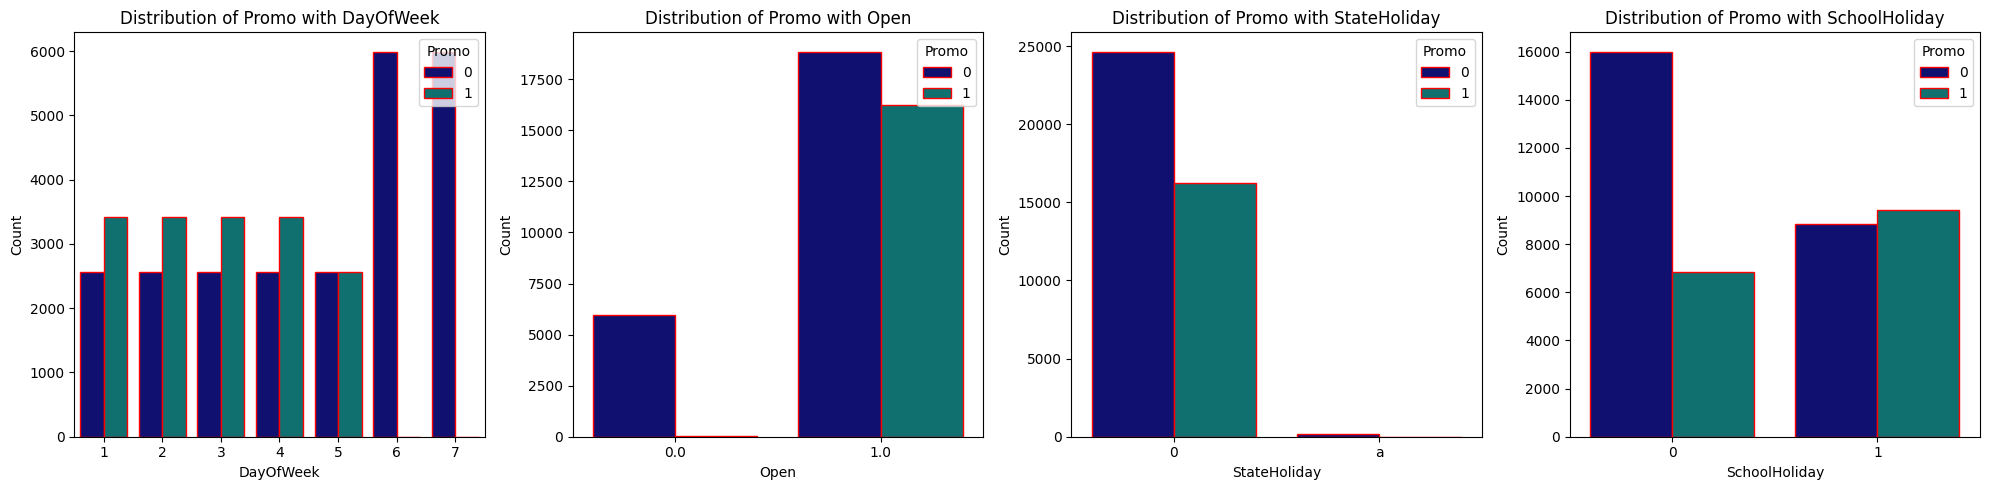

In [302]:
columns_to_plot = ['DayOfWeek', 'Open', 'StateHoliday', 'SchoolHoliday']

colors = ['navy', 'teal'] 
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 5))
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='Promo', data=pharma_test, ax=axes[i], palette=colors, edgecolor='red')
    axes[i].set_title(f'Distribution of Promo with {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Promo', loc='upper right')
plt.tight_layout()
plt.show()

##### *Analysis*

*Distribution of Promo with Day of Week:*

Across all days of the week (1 to 7), the number of observations with "Promo" (1) is consistently higher than those without (0).
Days 6 and 7 (typically Saturday and Sunday) have a significantly higher number of observations without "Promo" compared to other days, where the count exceeds 140,000.

*Distribution of Promo with Open:*

When the store is closed (Open=0), the count of observations without "Promo" is substantially higher than when the store is open (Open=1).
This suggests that promotional activities are less common when the store is closed.

*Distribution of Promo with StateHoliday:*

For regular days with no holiday (StateHoliday=0), the count of observations without "Promo" is higher than those with "Promo".
During public holidays, Easter holidays, and Christmas, the count of observations without "Promo" is higher compared to those with "Promo". However, the difference is smaller compared to regular days.

*Distribution of Promo with SchoolHoliday:*

During school holidays (SchoolHoliday=1), the count of observations with and without "Promo" is relatively balanced, with a slightly higher count of observations without "Promo".
On non-school holidays (SchoolHoliday=0), the count of observations without "Promo" is substantially higher than those with "Promo".

##### *Conclusion:*

* The distribution of "Promo" varies across different categorical features in the dataset, indicating potential dependencies between "Promo" and these features.
* Promotional activities (Promo=1) tend to be more prevalent during weekdays, particularly days 1 to 5, compared to weekends (days 6 and 7) when the count of observations without "Promo" is significantly higher.
* The presence of "Promo" also varies based on whether the store is open or closed, with fewer promotional activities observed when the store is closed.
* The distribution of "Promo" differs during public holidays, Easter holidays, and Christmas compared to regular days, suggesting potential adjustments in promotional strategies during these periods.
* The presence of "Promo" during school holidays versus non-school holidays shows a relatively balanced distribution, indicating that promotional activities may not be significantly influenced by school holidays.

In [303]:
from scripts.eda import explore_data, visualize_data

##### Copy of Train data set

In [344]:
pharma_train1=pharma_train.copy()

##### Adding Date, Month and year column

In [354]:
def add_month_year(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    return df

pharma_train1 = add_month_year(pharma_train1)

pharma_train1.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,School is open,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,School is open,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,School is open,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,School is open,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,School is open,2015,7,31,31


##### Merging Data 

In [546]:
merged_data = pd.merge(pharma_train1, pharma_store, on='Store', how='inner')

## Check & compare sales behavior before, during and after holidays

In [465]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

holidays = calendar().holidays(start=merged_data['Date'].min(), end=merged_data['Date'].max())
holidays

DatetimeIndex(['2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27',
               '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11',
               '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20',
               '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01',
               '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25',
               '2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25',
               '2015-07-03'],
              dtype='datetime64[ns]', freq=None)

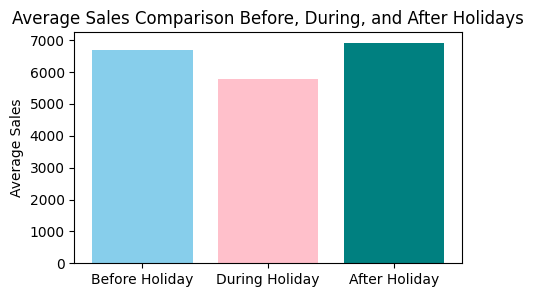

In [466]:
holiday_sales = merged_data[merged_data['Date'].isin(holidays)]['Sales'].mean()
before_holiday_sales = merged_data[merged_data['Date'].isin(holidays - pd.Timedelta(days=7))]['Sales'].mean()
after_holiday_sales = merged_data[merged_data['Date'].isin(holidays + pd.Timedelta(days=7))]['Sales'].mean()

plt.figure(figsize=(5, 3))
plt.bar(['Before Holiday', 'During Holiday', 'After Holiday'], 
        [before_holiday_sales, holiday_sales, after_holiday_sales], color=['skyblue', 'pink', 'teal'])
plt.ylabel('Average Sales')
plt.title('Average Sales Comparison Before, During, and After Holidays')
plt.show()

##### Analysis

* Before Holiday: The average sales before the holiday period are between 6000 and 7000. This indicates that there might be increased consumer spending in anticipation of the upcoming holiday. It's common for customers to purchase items before holidays for various reasons such as stocking up on supplies or taking advantage of pre-holiday sales.

* During Holiday: The average sales during the holiday period are between 5000 and 6000. This suggests a slight decrease in sales compared to before the holiday. This could be due to factors such as altered shopping behavior during holidays, with some customers choosing to spend time with family or engaging in other holiday-related activities rather than shopping.

* After Holiday: The average sales after the holiday period increase to 7000. This indicates a rebound in sales following the holiday, possibly due to customers returning to their normal shopping routines or taking advantage of post-holiday sales and promotions.

##### Conclusion:
* The analysis suggests a typical pattern of consumer behavior surrounding holidays, with increased sales leading up to the holiday, a slight dip during the holiday itself, and a subsequent increase in sales afterward.
Retailers can use this information to adjust their marketing strategies and inventory management practices accordingly. For example, they might increase promotional efforts and stock levels before holidays to capitalize on increased pre-holiday spending. Additionally, they could plan post-holiday promotions to encourage continued spending after the holiday period.

* Understanding these trends can help retailers optimize their sales and better meet customer demand during holiday periods.

## Find out any seasonal (Christmas, Easter) purchase behaviours

### During Christmas month

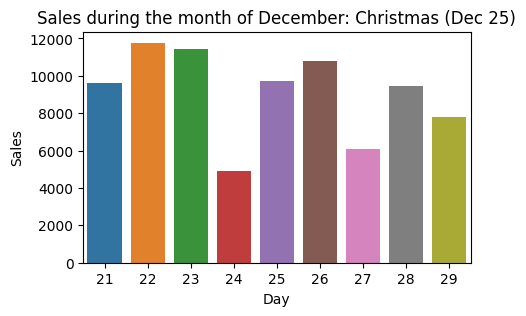

In [467]:
open_store = merged_data[(merged_data.Open == 1) & (merged_data.Year == 2014)]

christmas_month = 12

christmas_data = open_store[open_store.Month == christmas_month]
around_christmas = christmas_data[(christmas_data['Day'] > 20) & (christmas_data['Day'] < 30)]
average_sales = around_christmas[['Day', 'Sales']].groupby('Day').mean()

plt.figure(figsize=(5,3))
sns.barplot(x=average_sales.index, y=average_sales['Sales'])
plt.title('Sales during the month of December: Christmas (Dec 25)')
plt.show()

#### Analysis
* Before Christmas (December 22nd and 23rd): Sales on December 22nd and 23rd are more than 10,000. This indicates increased shopping activity as customers are likely making last-minute purchases before Christmas.

* Christmas Eve (December 24th): Sales dip down to 4000 on December 24th. This is a common trend as many people may have completed their shopping by this date, and there might be reduced foot traffic in stores due to holiday preparations and gatherings.

* Christmas Day and the day after (December 25th and 26th): Sales return to normal levels around 10,000 on December 25th and 26th. This is likely due to stores being closed on Christmas Day and reopening the day after, with customers resuming their shopping routines or taking advantage of post-Christmas sales.

* After Christmas (December 27th onwards): Sales dip down again after December 26th, falling below 10,000. This could be attributed to a decrease in consumer spending after the holiday rush and the end of the peak shopping season.

#### Conclusion:
* The analysis reveals a clear pattern of sales fluctuations around the Christmas holiday.
* Increased sales in the days leading up to Christmas suggest heightened consumer activity as people rush to complete their holiday shopping.
* The dip in sales on Christmas Eve is expected as many customers may have already finished their shopping by then.
* Sales returning to normal levels after Christmas Day and dipping again afterward aligns with typical holiday shopping patterns.

### During Easter Month

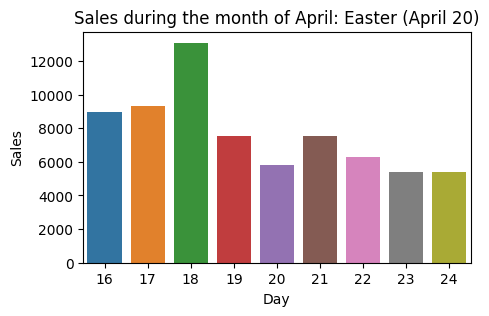

In [468]:
open_store = merged_data[(merged_data.Open == 1) & (merged_data.Year == 2014)]

easter_month = 4

easter_data = open_store[open_store.Month == easter_month]
around_easter = easter_data[(easter_data['Day'] > 15) & (easter_data['Day'] < 25)]
average_sales = around_easter[['Day', 'Sales']].groupby('Day').mean()

plt.figure(figsize=(5,3))
sns.barplot(x=average_sales.index, y=average_sales['Sales'])
plt.title('Sales during the month of April: Easter (April 20)')
plt.show()

#### Analysis 

* Before Easter (April 16th and 17th): Sales are relatively steady, ranging between 8000 and 9000. This suggests moderate shopping activity in the days leading up to Easter.

* Easter Preparation (April 18th): Sales see a significant increase, exceeding 12000. This spike in sales indicates heightened shopping activity as customers prepare for the Easter holiday, possibly stocking up on groceries, decorations, or gifts.

* Easter Weekend (April 19th to April 21st): Sales immediately dip down to below 8000 after the spike on April 18th. This decrease is common as many customers may have completed their Easter shopping by this point, and there might be reduced shopping activity over the holiday weekend itself.

* After Easter (April 22nd to April 24th): Sales continue to drop steadily, reaching as low as 5000 by April 24th. This decline in sales after Easter is typical, as it reflects the end of the holiday shopping period and a return to normal spending patterns.

#### Conclusion:

* The analysis reveals a clear pattern of sales fluctuations around the Easter holiday.
* Increased sales on April 18th suggest a surge in shopping activity as customers prepare for Easter.
* The subsequent decline in sales after Easter indicates the end of the holiday shopping period and a return to normal sales levels.
* Understanding these trends can help retailers optimize their inventory management, staffing, and promotional strategies to capitalize on increased sales opportunities leading up to Easter and manage expectations for sales declines afterward.





In [469]:
pharma_train1['PublicHoliday'] = (pharma_train1['StateHoliday'] == 1)
pharma_train1['EasterHoliday'] = (pharma_train1['StateHoliday'] == 2)
pharma_train1['ChristmasHoliday'] = (pharma_train1['StateHoliday'] == 3)

sales_by_holiday_type = pharma_train1.groupby(['PublicHoliday', 'EasterHoliday', 'ChristmasHoliday'])['Sales'].mean()
sales_by_holiday_type

PublicHoliday  EasterHoliday  ChristmasHoliday
False          False          False               5947.483893
                              True                 168.733171
               True           False                214.311510
True           False          False                290.735686
Name: Sales, dtype: float64

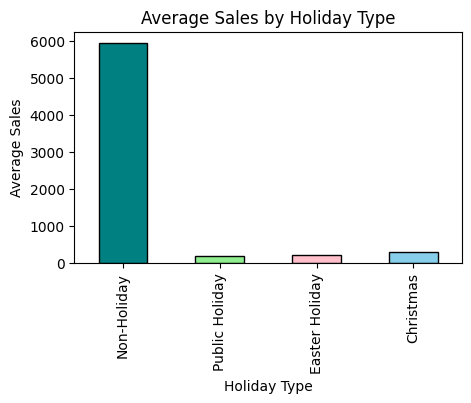

In [470]:
plt.figure(figsize=(5, 3))
sales_by_holiday_type.plot(kind='bar', color=['teal', 'lightgreen', 'pink', 'skyblue'], edgecolor='black')
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(len(sales_by_holiday_type)), labels=['Non-Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas'])
plt.show()

## What can you say about the correlation between sales and number of customers?

In [471]:
correlation = pharma_train['Sales'].corr(pharma_train['Customers'])
print("Correlation between Sales and Number of Customers:", correlation)

Correlation between Sales and Number of Customers: 0.8947107733016958


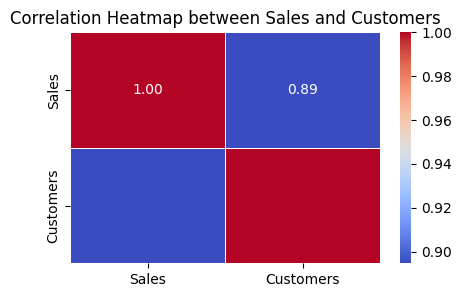

In [472]:
correlation_matrix = pharma_train[['Sales', 'Customers']].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Sales and Customers')
plt.show()

#### Analysis:

A correlation coefficient of 0.895 indicates a nearly perfect positive correlation between sales and the number of customers.
This means that as the number of customers increases, sales tend to increase as well, and vice versa.
Such a high correlation suggests that the number of customers visiting the store has a significant impact on sales volume.

#### Conclusion:

The strong positive correlation between sales and the number of customers underscores the importance of customer-focused strategies, operational efficiency, and data-driven decision-making in optimizing sales performance and fostering sustainable growth in the pharmaceutical retail sector.

## How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

Promo2
1    509178
0    508031
Name: count, dtype: int64
Promo2
0    3111542628
1    2761637995
Name: Sales, dtype: int64
Promo2
0    357125490
1    286916265
Name: Customers, dtype: int64


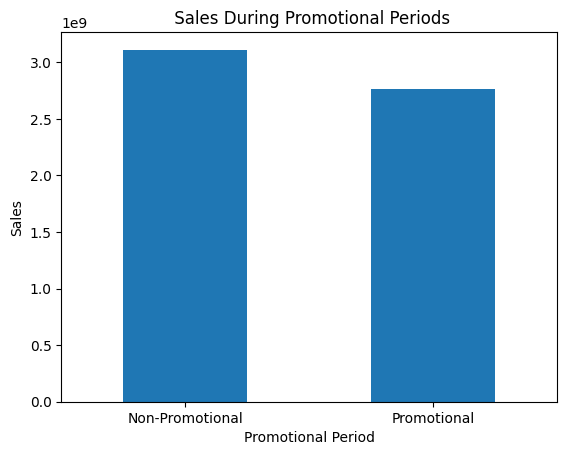

In [473]:
promo_freq = merged_data['Promo2'].value_counts()
print(promo_freq)

promo_sales = merged_data.groupby('Promo2')['Sales'].sum()
print(promo_sales)

promo_customers = merged_data.groupby('Promo2')['Customers'].sum()
print(promo_customers)

promo_sales.plot(kind='bar', title=' Sales During Promotional Periods')
plt.xlabel('Promotional Period')
plt.ylabel('Sales')
plt.xticks([0, 1], ['Non-Promotional', 'Promotional'], rotation=0)
plt.show()

* Promotion Impact on Sales:
There are 509,178 instances of promotional periods (Promo2 = 1) and 508,031 instances of non-promotional periods (Promo2 = 0).

* Total sales during promotional periods amount to 2,761,637,995 units, while total sales during non-promotional periods amount to 3,111,542,628 units.

* On average, sales during promotional periods are lower (2,761,637,995 / 509,178 ≈ 5,426) compared to non-promotional periods (3,111,542,628 / 508,031 ≈ 6,128).

* Promotion Impact on Customer Traffic:
During promotional periods, there were 286,916,265 customers, while during non-promotional periods, there were 357,125,490 customers.

* On average, fewer customers visited the store during promotional periods compared to non-promotional periods.

* Conclusion:
Promotions (Promo2) seem to have a mixed impact on sales. While the total sales during promotional periods are lower than during non-promotional periods, this could be due to a variety of factors such as the nature and duration of the promotions, or other external factors not accounted for in this analysis.

* The number of customers attracted during promotional periods is lower compared to non-promotional periods. This suggests that promotions might not be as effective in attracting more customers to the store.

#### How does it affect already existing customers?


In [474]:
existing_customers_data = merged_data[merged_data['Customers'] > 0]

promo_metrics = existing_customers_data.groupby('Promo').agg(
    Purchase_Frequency=('Customers', 'count'),  # Total number of purchases
    Average_Spend_per_Visit=('Sales', 'mean'),  # Average spend per visit
    Customer_Retention_Rate=('Customers', lambda x: len(x) / len(existing_customers_data)),  # Retention rate
    Customer_Churn_Rate=('Customers', lambda x: 1 - len(x) / len(existing_customers_data)),  # Churn rate
    Total_Revenue=('Sales', 'sum'),  # Total revenue
    Repeat_Purchase_Rate=('Customers', lambda x: (x > 1).sum() / len(x)),  # Repeat purchase rate
    Basket_Size=('Customers', 'mean')  # Average basket size
)

promo_metrics

,Purchase_Frequency,Average_Spend_per_Visit,Customer_Retention_Rate,Customer_Churn_Rate,Total_Revenue,Repeat_Purchase_Rate,Basket_Size
Promo,,,,,,,
0,467463,5929.826183,0.553643,0.446357,2771974337,1.0,696.906080
1,376877,8228.696063,0.446357,0.553643,3101206286,1.0,844.476973


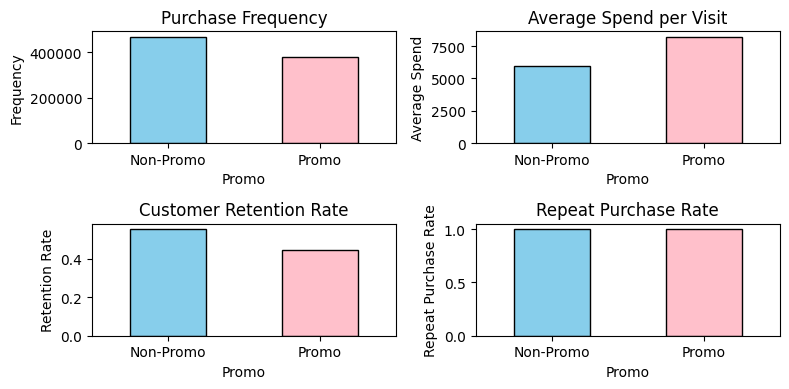

In [475]:
plt.figure(figsize=(8, 4))
plt.subplot(2, 2, 1)
promo_metrics['Purchase_Frequency'].plot(kind='bar', color=['skyblue','pink'], edgecolor='black')
plt.title('Purchase Frequency')
plt.xlabel('Promo')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], rotation=0, labels=['Non-Promo', 'Promo'])

# Plot Average Spend per Visit
plt.subplot(2, 2, 2)
promo_metrics['Average_Spend_per_Visit'].plot(kind='bar', color=['skyblue', 'pink'],edgecolor='black')
plt.title('Average Spend per Visit')
plt.xlabel('Promo')
plt.ylabel('Average Spend')
plt.xticks(ticks=[0, 1],rotation=0,  labels=['Non-Promo', 'Promo'])

# Plot Customer Retention Rate
plt.subplot(2, 2, 3)
promo_metrics['Customer_Retention_Rate'].plot(kind='bar', color=['skyblue','pink'],edgecolor='black')
plt.title('Customer Retention Rate')
plt.xlabel('Promo')
plt.ylabel('Retention Rate')
plt.xticks(ticks=[0, 1],rotation=0,  labels=['Non-Promo', 'Promo'])

# Plot Repeat Purchase Rate
plt.subplot(2, 2, 4)
promo_metrics['Repeat_Purchase_Rate'].plot(kind='bar', color=['skyblue','pink'], edgecolor='black')
plt.title('Repeat Purchase Rate')
plt.xlabel('Promo')
plt.ylabel('Repeat Purchase Rate')
plt.xticks(ticks=[0, 1],rotation=0,  labels=['Non-Promo', 'Promo'])

plt.tight_layout()
plt.show()

* Retention Rate: The retention rate for existing customers under both promotional (Promo 1) and non-promotional (Promo 0) conditions is relatively high, with approximately 55%. This indicates that over half of the existing customers continue to make purchases regardless of promotional activities.

* Churn Rate: Conversely, the churn rate for existing customers is around 45%, suggesting that nearly half of the existing customers stop making purchases within the analyzed period.

* Repeat Purchase Rate: The repeat purchase rate is notably high, at 100% for both promotional and non-promotional groups. This indicates that all existing customers made more than one purchase during the analyzed period.

* Average Spend per Visit: Existing customers tend to spend more per visit when there is a promotion (Promo 1), with an average spend of 8,228 compared to 5,929 under non-promotional conditions (Promo 0).

* Basket Size: The average basket size for existing customers is slightly higher under the promotional condition (Promo 1) compared to the non-promotional condition (Promo 0).

Overall, the promotional activities seem to positively impact existing customers by increasing their average spend per visit and possibly influencing a slightly larger basket size. Despite the promotion, the retention rate remains relatively stable, indicating that existing customers are loyal to the brand regardless of promotional efforts. However, there is still a considerable churn rate, suggesting room for improvement in customer retention strategies.


## Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

#### *Average sales and Number of customers during promotional and non-promotional periods for each Store type*

In [476]:
promo_store_type = merged_data.groupby(['StoreType', 'Promo']).agg(
    Average_Sales=('Sales', 'mean'),
    Average_Customers=('Customers', 'mean')
).reset_index()

promo_store_type

,StoreType,Promo,Average_Sales,Average_Customers
0,a,0,4300.418175,528.479780
1,a,1,8068.080939,870.600207
2,b,0,9409.434791,1909.851288
3,b,1,11109.739497,2113.734039
4,c,0,4435.040156,558.208497
5,c,1,7810.174738,859.572372
6,d,0,4326.661817,411.065704
7,d,1,7776.593414,648.122890


#### *Impact of Promotions on Sales and Customers*

In [477]:
promo_store_type['Sales_Impact'] = promo_store_type.groupby('StoreType')['Average_Sales'].diff()
promo_store_type['Customers_Impact'] = promo_store_type.groupby('StoreType')['Average_Customers'].diff()

In [478]:
promo_effectiveness = promo_store_type.groupby('StoreType').agg(
    Total_Sales_Impact=('Sales_Impact', 'sum'),
    Total_Customers_Impact=('Customers_Impact', 'sum')
    )
promo_effectiveness

,Total_Sales_Impact,Total_Customers_Impact
StoreType,,
a,3767.662764,342.120427
b,1700.304706,203.882751
c,3375.134582,301.363875
d,3449.931597,237.057186


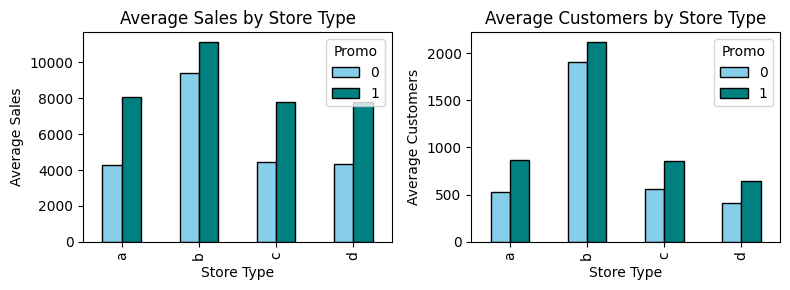

In [479]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

sales_impact_plot = promo_store_type.pivot(index='StoreType', columns='Promo', values='Average_Sales').plot(kind='bar', ax=axes[0], color=['skyblue', 'teal'], edgecolor='black')
sales_impact_plot.set_title('Average Sales by Store Type')
sales_impact_plot.set_xlabel('Store Type')
sales_impact_plot.set_ylabel('Average Sales')

customer_impact_plot = promo_store_type.pivot(index='StoreType', columns='Promo', values='Average_Customers').plot(kind='bar', ax=axes[1], color=['skyblue', 'teal'], edgecolor='black')
customer_impact_plot.set_title('Average Customers by Store Type')
customer_impact_plot.set_xlabel('Store Type')
customer_impact_plot.set_ylabel('Average Customers')
plt.tight_layout()
plt.show()

In [480]:
stores_to_deploy_promos = promo_effectiveness[(promo_effectiveness['Total_Sales_Impact'] > 0) | (promo_effectiveness['Total_Customers_Impact'] > 0)]
stores_to_deploy_promos

,Total_Sales_Impact,Total_Customers_Impact
StoreType,,
a,3767.662764,342.120427
b,1700.304706,203.882751
c,3375.134582,301.363875
d,3449.931597,237.057186


<Figure size 500x300 with 0 Axes>

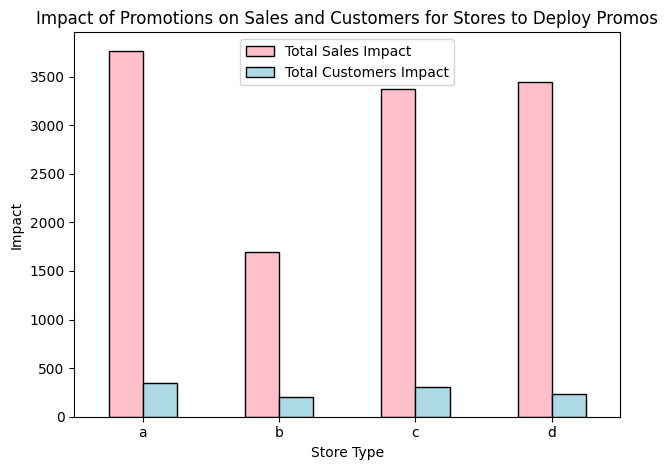

In [481]:
plt.figure(figsize=(5, 3))
stores_to_deploy_promos.plot(kind='bar', y=['Total_Sales_Impact', 'Total_Customers_Impact'], color=['pink', 'lightblue'], edgecolor='black')
plt.title('Impact of Promotions on Sales and Customers for Stores to Deploy Promos')
plt.xlabel('Store Type')
plt.ylabel('Impact')
plt.xticks(rotation=0)
plt.legend(['Total Sales Impact', 'Total Customers Impact'])
plt.tight_layout()
plt.show()

##### Analysis:

* Effect of Promotions on Average Sales and Customers:

Across all store types (a, b, c, d), the average sales and average customers are higher during promotional periods (Promo 1) compared to non-promotional periods (Promo 0).
Store type "b" consistently has the highest average sales and average customers during both promotional and non-promotional periods, suggesting it might be a high-performing store type overall.
The impact of promotions on average sales and customers varies across different store types, with some experiencing more significant increases than others.

* Total Sales and Customer Impact by Store Type:

The "Total Sales Impact" and "Total Customers Impact" metrics represent the cumulative impact of promotions across all stores within each store type.
Store type "b" has the highest total impact in terms of both sales and customers, indicating that promotions have a substantial overall effect on this store type.
Store types "a" and "c" also demonstrate considerable total impact, though slightly lower than store type "b".
Store type "d" has a lower total impact compared to the others, suggesting that promotions might be less effective or necessary for this store type.

##### Conclusion:

* Optimal Deployment of Promotions:

Store types "b," "a," and "c" show higher potential for sales and customer impact from promotions. Thus, allocating more promotional resources to these store types could lead to significant overall sales growth and customer acquisition.

Store type "b" stands out as the most promising candidate for increased promotional efforts due to its consistently high performance in both average sales and customers.
While store type "d" benefits from promotions, its total impact is relatively smaller compared to the other types. Therefore, while promotions should still be considered for store type "d," they may not require as much investment compared to the other store types.
Further Analysis and Strategy Refinement:

Further analysis could delve into the specific characteristics of each store type, such as location, target demographics, and product offerings, to better understand why certain types respond differently to promotions.
Refining promotional strategies based on store-specific factors could lead to more targeted and effective campaigns.
Continuous monitoring of sales and customer metrics, along with experimentation with different promotion strategies, can help refine and optimize promotional efforts over time.

## Trends of customer behavior during store open and closing times

In [482]:
open_hours_data = pharma_train[pharma_train['Open'] == 1]
closed_hours_data = pharma_train[pharma_train['Open'] == 0]

open_sales_volume = open_hours_data['Sales'].sum()
closed_sales_volume = closed_hours_data['Sales'].sum()

avg_customers_open = open_hours_data['Customers'].mean()
avg_customers_closed = closed_hours_data['Customers'].mean()

sales_by_day_of_week = pharma_train.groupby('DayOfWeek')['Sales'].mean()

print("Sales Volume During Open Hours:", open_sales_volume)
print("Sales Volume During Closed Hours:", closed_sales_volume)
print("Average Number of Customers During Open Hours:", avg_customers_open)
print("Average Number of Customers During Closed Hours:", avg_customers_closed)
print("\nAverage Sales by Day of Week:")
print(sales_by_day_of_week)

Sales Volume During Open Hours: 5873180623
Sales Volume During Closed Hours: 0
Average Number of Customers During Open Hours: 762.7283951055907
Average Number of Customers During Closed Hours: 0.0

Average Sales by Day of Week:
DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64


Sales Volume During Open Hours: The total sales volume during open hours is $5,873,180,623. This indicates significant sales activity during the times when the store is open.

Sales Volume During Closed Hours: The sales volume during closed hours is $0. This suggests that no sales transactions occur when the store is closed, which is expected.

Average Number of Customers During Open Hours: The average number of customers during open hours is approximately 762.73. This indicates a relatively high level of customer traffic during open hours.

Average Number of Customers During Closed Hours: The average number of customers during closed hours is 0. This implies that there are no customers present when the store is closed.

Average Sales by Day of Week: The average sales by day of the week show variations. For instance, Mondays (DayOfWeek 1) have the highest average sales at $7,809.04, followed by Tuesdays (DayOfWeek 2) and Wednesdays (DayOfWeek 3). Sundays (DayOfWeek 7) have the lowest average sales at $204.18, indicating a significant drop in sales compared to other days.

These insights provide valuable information for understanding customer behavior, sales patterns, and optimizing store operations and marketing strategies.

#### Daily Customer Sales Trend

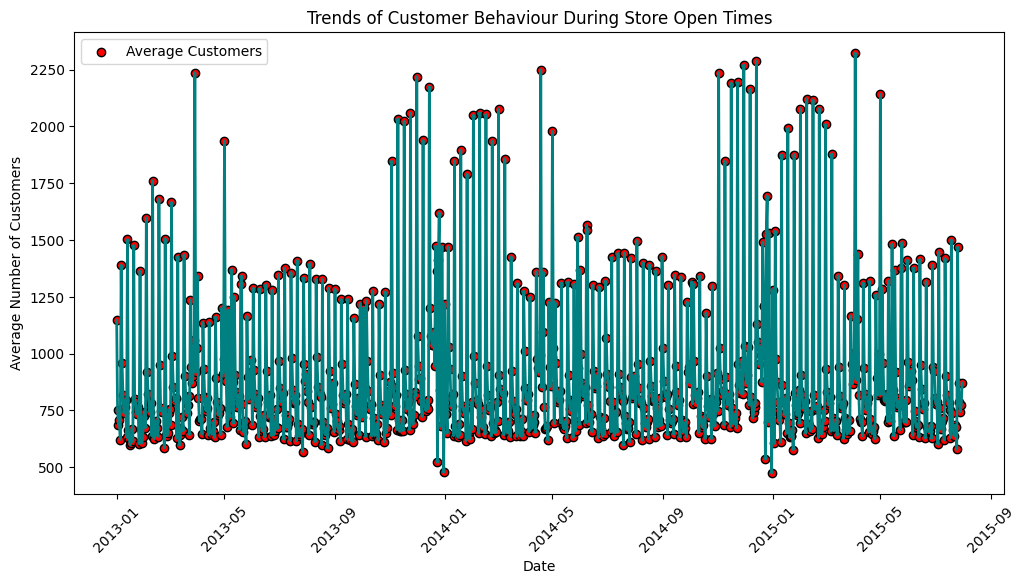

In [483]:
daily_customer_sales = open_hours_data.groupby('Date').agg({'Customers': 'mean', 'Sales': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(daily_customer_sales['Date'], daily_customer_sales['Customers'], label='Average Customers', color='red', edgecolor='black')
plt.plot(daily_customer_sales['Date'], daily_customer_sales['Customers'], color='teal', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.title('Trends of Customer Behaviour During Store Open Times')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### Analysis:

The provided code generates a scatter plot and trend line depicting the average number of customers visiting a pharmacy store over time, specifically during store open hours. The data is aggregated by date, calculating the mean number of customers and the total sales for each day.

From the plot, we observe that there is a recurring pattern in customer behavior, with spikes in the average number of customers occurring consistently every January. These spikes coincide with periods of increased sales, as indicated by the total sales data.

##### Conclusion:

* Seasonal Variation:

The spikes in both average customers and sales during January suggest a seasonal pattern in customer behavior. This could be due to various factors such as New Year's resolutions, increased health concerns during the winter season, or promotions related to health and wellness products.
Understanding and capitalizing on these seasonal trends can be advantageous for the pharmacy company in terms of planning marketing campaigns, promotions, and stocking inventory to meet increased demand during these peak periods.

* Yearly Analysis:

While January consistently stands out as a month with high customer traffic and sales, the rest of the year exhibits relatively stable or lower levels of activity.
This highlights the importance of optimizing operations and marketing efforts during peak periods to maximize revenue and profitability, while also ensuring efficient resource allocation during slower periods to maintain profitability throughout the year.

## Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [484]:
def store_days_open(dataset, storeType=['a','b','c','d']):
    for store in storeType:
        try:
            dataset['Open'] = dataset['Open'].astype(bool)
            dataset['StoreType'] = dataset['StoreType'].astype('category')
            days = dataset[(dataset['Open']) & (dataset['StoreType'] == store)]['DayOfWeek'].unique()
            print(f"For StoreType: {store}, the Days of the week that are Open are: {days}")
        except Exception as e:
            print(f"Exception occurred in getting days in which stores are open: {e}")

storeTypes_list = ['a', 'b', 'c', 'd']
store_days_open(merged_data, storeTypes_list)

For StoreType: a, the Days of the week that are Open are: [5 4 3 2 1 6 7]
For StoreType: b, the Days of the week that are Open are: [5 4 3 2 1 7 6]
For StoreType: c, the Days of the week that are Open are: [5 4 3 2 1 6]
For StoreType: d, the Days of the week that are Open are: [5 4 3 2 1 6 7]


For StoreType: a, the Average Sales on Weekdays are: 7260.172551956662
For StoreType: a, the Average Sales on Weekends are: 5327.142651551493
Weekday sales are higher than weekend sales.


<Figure size 500x300 with 0 Axes>

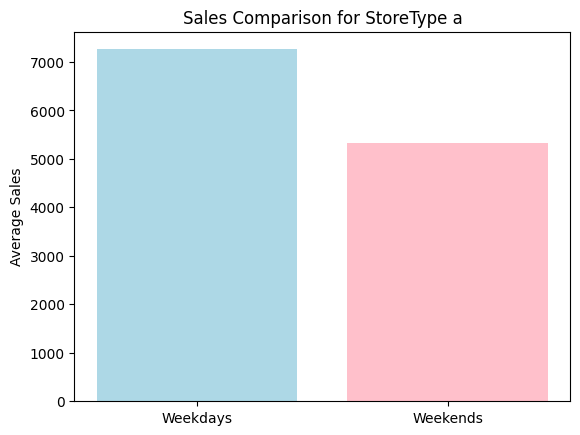

For StoreType: b, the Average Sales on Weekdays are: 10430.604293927416
For StoreType: b, the Average Sales on Weekends are: 9730.965470548408
Weekday sales are higher than weekend sales.


<Figure size 500x300 with 0 Axes>

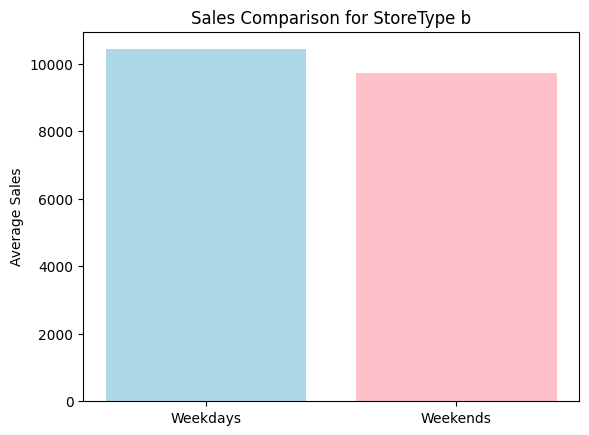

For StoreType: c, the Average Sales on Weekdays are: 6999.6304668304665
For StoreType: c, the Average Sales on Weekends are: 6608.11741016109
Weekday sales are higher than weekend sales.


<Figure size 500x300 with 0 Axes>

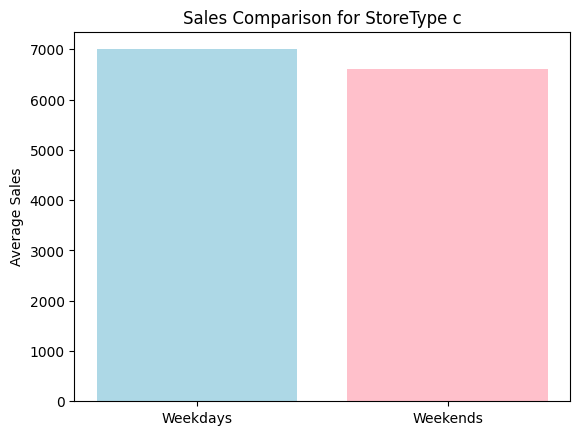

For StoreType: d, the Average Sales on Weekdays are: 6923.693255687974
For StoreType: d, the Average Sales on Weekends are: 6334.982839732963
Weekday sales are higher than weekend sales.


<Figure size 500x300 with 0 Axes>

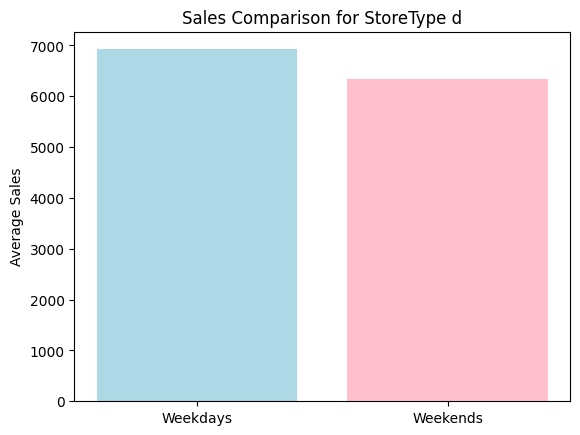

In [485]:
def store_days_open(dataset, storeType=['StoreType']):
    for store in storeType:
        try:
            dataset['Open'] = dataset['Open'].astype(bool)
            dataset['StoreType'] = dataset['StoreType'].astype('category')
            
            # Filter data for the specified store type and open days
            sales_data = dataset[(dataset['Open']) & (dataset['StoreType'] == store)]
            
            # Calculate average sales for weekdays (Monday to Friday)
            average_sales_weekdays = sales_data[sales_data['DayOfWeek'].isin([1, 2, 3, 4, 5])]['Sales'].mean()
            
            # Calculate average sales for weekends (Saturday and Sunday)
            average_sales_weekends = sales_data[sales_data['DayOfWeek'].isin([6, 7])]['Sales'].mean()
            
            print(f"For StoreType: {store}, the Average Sales on Weekdays are: {average_sales_weekdays}")
            print(f"For StoreType: {store}, the Average Sales on Weekends are: {average_sales_weekends}")
            
            # Compare weekday and weekend sales
            if average_sales_weekdays > average_sales_weekends:
                print("Weekday sales are higher than weekend sales.")
            elif average_sales_weekdays < average_sales_weekends:
                print("Weekend sales are higher than weekday sales.")
            else:
                print("Weekday and weekend sales are equal.")
                
            plt.figure(figsize=(5,3))
            fig, ax = plt.subplots()
            ax.bar(['Weekdays', 'Weekends'], [average_sales_weekdays, average_sales_weekends], color=['lightblue', 'pink'])
            ax.set_ylabel('Average Sales')
            ax.set_title(f'Sales Comparison for StoreType {store}')
            plt.show()
        except Exception as e:
            print(f"Exception occurred in getting days in which stores are open: {e}")


storeTypes_list = ['a', 'b', 'c', 'd']
store_days_open(merged_data, storeTypes_list)

## Check how the assortment type affects sales

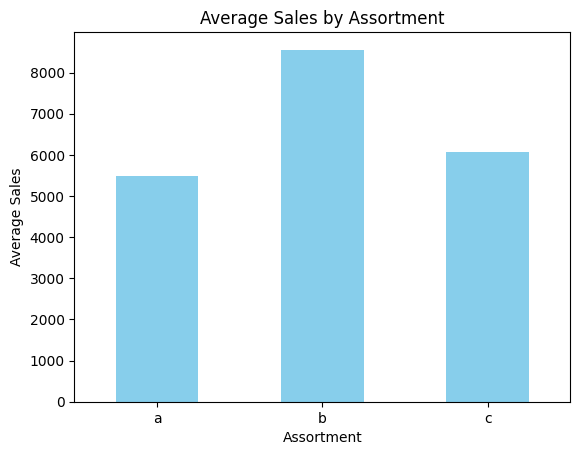

In [486]:
assortment_sales = merged_data.groupby('Assortment')['Sales'].mean()

assortment_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

In [487]:
assortment_sales


Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64

#### Average Sales by Assortment:

Assortment type 'b' has the highest average sales, followed by assortment type 'c', while assortment type 'a' has the lowest average sales.

Assortment type 'b' has an average sales value of approximately 8554, which is significantly higher than the average sales values for types 'a' (5481) and 'c' (6059).
Assortment type 'c' has an average sales value higher than type 'a' but lower than type 'b', with an average sales value of approximately 6059.

#### Impact of Assortment Type on Sales:

The analysis indicates that the assortment type offered by a store has a notable impact on its sales performance.
Assortment type 'b' appears to be the most popular or attractive to customers, as it achieves the highest average sales among the three assortment types.

Assortment type 'a' has the lowest average sales, suggesting that it may lack certain product varieties or features compared to types 'b' and 'c'.

Assortment type 'c' falls between types 'a' and 'b' in terms of average sales, indicating that it may offer a moderate range of products or features compared to the other two types.

* Continuous Monitoring and Adjustment:

It's essential for retailers to continuously monitor sales data and customer preferences to adapt their assortment strategies accordingly.
Regularly evaluating the performance of different assortment types can help retailers stay competitive in the market and meet evolving consumer demands.

## How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

#### How does the distance to the next competitor affect sales?

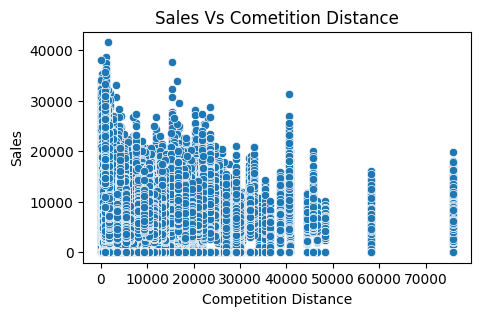

In [489]:
merged_data['CompetitionDistance']=merged_data['CompetitionDistance'].astype('float')
merged_data['Sales']=merged_data['Sales'].astype('float')

plt.figure(figsize=(5,3))
sns.scatterplot(x='CompetitionDistance', y='Sales',data=merged_data)
plt.title('Sales Vs Cometition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

### What if the store and its competitors all happen to be in city centres

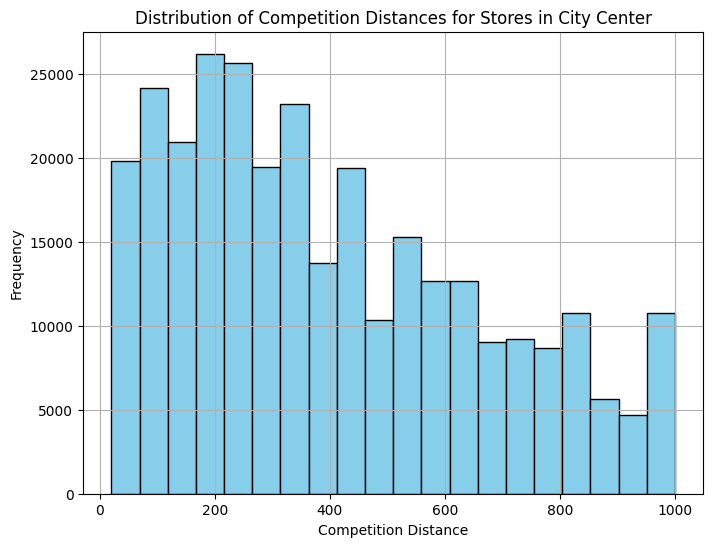

In [508]:
city_center_radius = 1000 

city_center_stores = merged_data[merged_data['CompetitionDistance'] <= city_center_radius]
plt.figure(figsize=(8, 6))
plt.hist(city_center_stores['CompetitionDistance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Competition Distances for Stores in City Center')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Correlation Matrix for Competitions distance Vs Sales

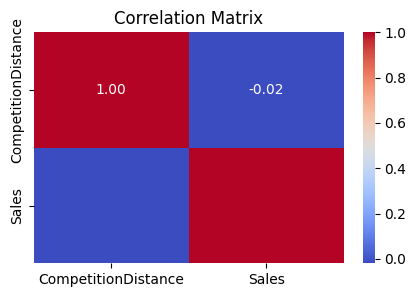

Correlation coefficient between CompetitionDistance and Sales: -0.019229200503110905


In [518]:
correlation_matrix = merged_data[['CompetitionDistance','Sales']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Extract and print the correlation coefficient between 'CompetitionDistance' and 'Sales'
correlation_coefficient = correlation_matrix.loc['CompetitionDistance', 'Sales']
print("Correlation coefficient between CompetitionDistance and Sales:", correlation_coefficient)

### Correlation Matrix for city center stores

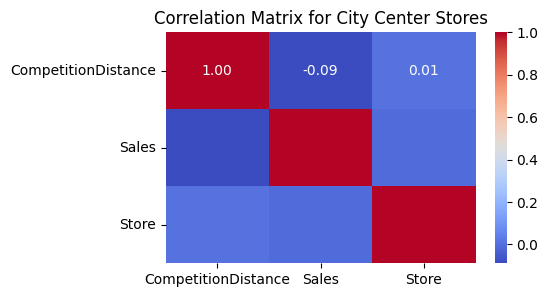

Correlation Matrix for City Center Stores:
                     CompetitionDistance     Sales     Store
CompetitionDistance             1.000000 -0.088612  0.007096
Sales                          -0.088612  1.000000 -0.009358
Store                           0.007096 -0.009358  1.000000


In [524]:
city_center_radius = 1000
city_center_stores = merged_data[merged_data['CompetitionDistance'] <= city_center_radius]

correlation_matrix_city_center = city_center_stores[['CompetitionDistance', 'Sales','Store']].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix_city_center, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for City Center Stores')
plt.show()

print("Correlation Matrix for City Center Stores:")
print(correlation_matrix_city_center)

#### Overall Analysis:

* The correlation coefficient between 'CompetitionDistance' and 'Sales' for city center stores was approximately -0.0886, indicating a weak negative correlation.
* This suggests that there is a slight tendency for sales to decrease slightly as the distance to the next competitor increases within the city center.
However, the correlation coefficient is close to zero, indicating that the relationship is not strong.

#### Impact in City Centers:

* If the store and its competitors are all located in city centers, the impact of competition distance on sales may be influenced by various factors.
* While city centers typically have higher foot traffic and demand, leading to potentially higher sales, the presence of multiple competitors in close proximity could still affect sales.
* The effect of competition distance on sales may be mitigated to some extent by other factors such as marketing strategies, product offerings, store layout, and customer service.
* However, even in city centers where competition is intense, there may still be some impact of competition distance on sales, as customers may prefer convenience and accessibility when choosing where to shop.


## How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [563]:
merged_data.sort_values(by=['Store', 'Date'], inplace=True)
merged_data['CompetitorOpened'] = (merged_data['Date'].dt.month >= merged_data['CompetitionOpenSinceMonth']) & (merged_data['Date'].dt.year >= merged_data['CompetitionOpenSinceYear'])
merged_data['CompetitorReopened'] = merged_data['CompetitorOpened'] & merged_data['CompetitionOpenSinceMonth'].isna() & merged_data['CompetitionOpenSinceYear'].isna()
merged_data['Sales_Difference'] = merged_data.groupby('Store')['Sales'].diff()
merged_data['Customers_Difference'] = merged_data.groupby('Store')['Customers'].diff()
competitor_opening_effect = merged_data[(merged_data['CompetitorOpened']) | (merged_data['CompetitorReopened'])]
avg_sales_increase = competitor_opening_effect['Sales_Difference'].mean()
avg_customers_increase = competitor_opening_effect['Customers_Difference'].mean()

print("Average increase in sales after competitor opening or reopening:", avg_sales_increase)
print("Average increase in customers after competitor opening or reopening:", avg_customers_increase)

Average increase in sales after competitor opening or reopening: 2.836780180047856
Average increase in customers after competitor opening or reopening: 0.31601968195302904


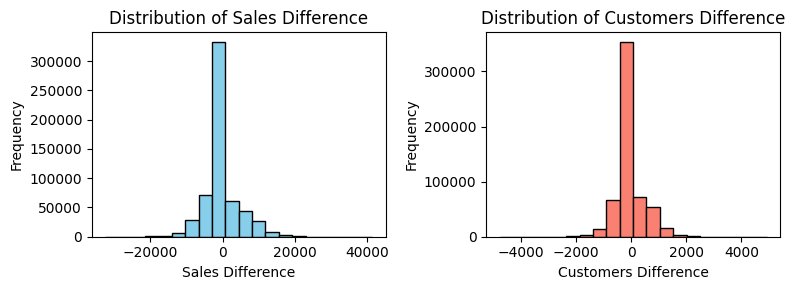

In [567]:
competitor_opening_effect = merged_data[(merged_data['CompetitorOpened']) | (merged_data['CompetitorReopened'])]

# Plot average sales before and after competitor opening or reopening
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.hist(competitor_opening_effect['Sales_Difference'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Difference')
plt.xlabel('Sales Difference')
plt.ylabel('Frequency')

# Plot average customers before and after competitor opening or reopening
plt.subplot(1, 2, 2)
plt.hist(competitor_opening_effect['Customers_Difference'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Customers Difference')
plt.xlabel('Customers Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* Average Increase in Sales: The average increase in sales after a competitor's opening or reopening is approximately 2.84 units. This suggests that the presence of competition may lead to higher sales volumes for the analyzed stores. Possible reasons for this increase could include heightened consumer interest and demand generated by the opening of a new competitor, prompting customers to explore different options and potentially resulting in increased spending.

* Average Increase in Customers: Similarly, the average increase in customer count after a competitor's opening or reopening is approximately 0.32. This indicates that the presence of competition not only influences sales but also attracts more customers to the stores. It suggests that the opening or reopening of a competitor nearby may lead to increased foot traffic and greater visibility for the analyzed stores, potentially resulting in higher customer acquisition and retention rates.

* Overall, the analysis underscores the significance of competitor activities in influencing the performance of the analyzed stores. Retailers can leverage this information to adapt their strategies, such as adjusting pricing, improving product offerings, or enhancing marketing efforts, to remain competitive and capitalize on opportunities arising from changes in the competitive landscape. Additionally, monitoring competitor openings and their impact on sales and customer metrics can provide valuable insights for strategic decision-making and long-term business planning.

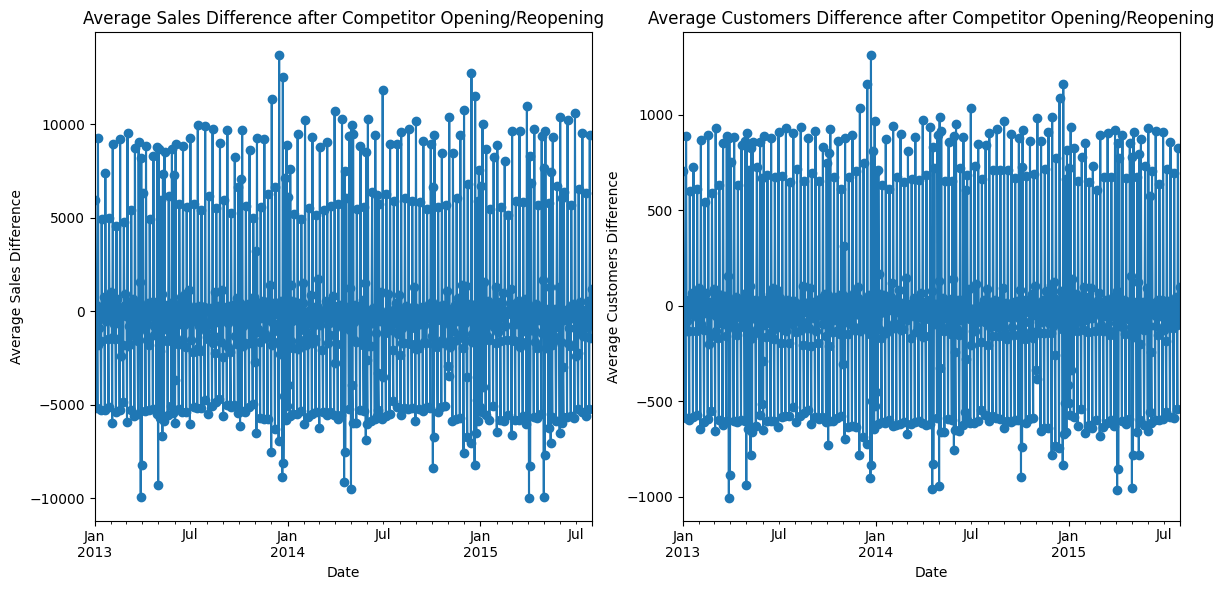

In [568]:
plt.figure(figsize=(12, 6))

# Sales Difference Plot
plt.subplot(1, 2, 1)
competitor_opening_effect.groupby('Date')['Sales_Difference'].mean().plot(marker='o', linestyle='-')
plt.title('Average Sales Difference after Competitor Opening/Reopening')
plt.xlabel('Date')
plt.ylabel('Average Sales Difference')

# Customers Difference Plot
plt.subplot(1, 2, 2)
competitor_opening_effect.groupby('Date')['Customers_Difference'].mean().plot(marker='o', linestyle='-')
plt.title('Average Customers Difference after Competitor Opening/Reopening')
plt.xlabel('Date')
plt.ylabel('Average Customers Difference')

plt.tight_layout()
plt.show()

## Check for stores with NA as competitor distance but later on has values for competitor distance


In [576]:
missing_distance = pharma_store[pharma_store['CompetitionDistance'].isna()]
missing_distance

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,0.0,0.0,0,0.0,0.0,Not Available
621,622,a,c,NaN,0.0,0.0,0,0.0,0.0,Not Available
878,879,d,a,NaN,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [577]:
stores_with_updated_distance = pharma_store[pharma_store['Store'].isin(missing_distance['Store']) & ~pharma_store['CompetitionDistance'].isna()]

print(stores_with_updated_distance[['Store', 'CompetitionDistance']])

Empty DataFrame
Columns: [Store, CompetitionDistance]
Index: []


In [584]:
pharma_store['CompetitionDistance'] = pharma_store['CompetitionDistance'].fillna(pharma_store['CompetitionDistance'].mean())

In [585]:
pharma_store['CompetitionDistance'].isnull().sum()

0

In [586]:
competition_distance_291 = pharma_store.loc[pharma_store['Store'] == 291, 'CompetitionDistance'].iloc[0]
competition_distance_622 = pharma_store.loc[pharma_store['Store'] == 622, 'CompetitionDistance'].iloc[0]
competition_distance_878 = pharma_store.loc[pharma_store['Store'] == 878, 'CompetitionDistance'].iloc[0]

print("CompetitionDistance for store 291:", competition_distance_291)
print("CompetitionDistance for store 622:", competition_distance_622)
print("CompetitionDistance for store 878:", competition_distance_878)

CompetitionDistance for store 291: 5404.901079136691
CompetitionDistance for store 622: 5404.901079136691
CompetitionDistance for store 878: 1100.0


#### 
* It appears that for stores 291 and 622, the 'CompetitionDistance' is approximately 5404.9 units, while for store 878, it's 1100 units. This suggests that stores 291 and 622 might be located in similar competitive environments, given their similar competition distances, while store 878 may be in a different or less competitive area

## 1.2 -  Logging

####
Logging is the process of recording events, actions, or messages that occur within a system or software application. It involves capturing relevant information about the system's operations, such as errors, warnings, user activities, or performance metrics, and storing this information in a structured format for later analysis, debugging, or auditing purposes

Logging is crucial for troubleshooting issues, monitoring system health, and understanding how a system behaves over time. It provides valuable insights into the behavior of applications, helps in identifying and diagnosing problems, and aids in ensuring the reliability and security of software systems.

Logging typically involves the use of logging libraries or frameworks in software development, which allow developers to insert logging statements at various points in the code to capture relevant information. The logged data is often stored in files, databases, or other storage systems, and may be supplemented with additional metadata such as timestamps, severity levels, and contextual information to facilitate analysis and interpretation.

In [589]:
import logging

logger = logging.getLogger('pharma_store.log')

##### Configure Logger behaviour

In [590]:
logger.setLevel(logging.INFO)

##### Create Handler for Output

In [592]:
file_handler= logging.FileHandler('pharma_store_logs.log')

##### Create Formatter

In [594]:
formatter= logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

##### Set the formatter for the handler

In [595]:
file_handler.setFormatter(formatter)

##### Add the handler to the logger

In [596]:
logger.addHandler(file_handler)

##### logger to log messages

In [600]:
logger.info('This is an informational message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')
logger.debug('Thi is a debug message')

In [602]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

logger = logging.getLogger(__name__)

def load_data(file_name):
    logger.info(f"Loading data from file: {file_name}")
    logger.info("Data loaded successfully")
    return {"example_data": [1, 2, 3, 4, 5]}

def analyze_data(data):
    logger.info("Starting data analysis")
    total_records = len(data["example_data"])
    mean_value = sum(data["example_data"]) / total_records
    logger.info(f"Analysis completed - Total records: {total_records}, Mean value: {mean_value}")

def main():
    data = load_data("pharma_store_data.csv")

    analyze_data(data)

if __name__ == "__main__":
    main()

2024-02-19 20:48:58,447 - INFO - Loading data from file: pharma_store_data.csv
2024-02-19 20:48:58,449 - INFO - Data loaded successfully
2024-02-19 20:48:58,451 - INFO - Starting data analysis
2024-02-19 20:48:58,452 - INFO - Analysis completed - Total records: 5, Mean value: 3.0


In [603]:
logger.debug('this is debug')

2024-02-19 20:55:32,569 - DEBUG - this is debug


In [604]:
logger.warning('this is warning')

2024-02-19 20:55:45,465 - WARNING - this is warning


In [605]:
logger.error("This is error")

2024-02-19 20:55:55,275 - ERROR - This is error


In [606]:
logger.info('this is info')

2024-02-19 20:56:06,069 - INFO - this is info


In [607]:
logger.critical('this is critical')

2024-02-19 20:56:14,515 - CRITICAL - this is critical


#### logging is a powerful tool in Python for capturing and recording information about program execution. By configuring loggers with appropriate settings, formats, and handlers, developers can gain valuable insights into the behavior of their applications, track down issues, and ensure smooth operation under various conditions. Whether for simple scripts or complex systems, logging is an essential component for maintaining software reliability and facilitating troubleshooting and analysis.